# Бутстрэп

## Введение

Словом "бутстрэп" обозначают некоторое семейство или множество статистических методов или алгоритмов, предназначенных для нахождения оценок параметров распределения и доверительных интервалов. Эти методы основаны на генерации большого числа выборок из исходной (имеющейся в распоряжении исследователя) выборки с возвращениями с использованием датчика (псевдо-) случайных чисел. Таким образом, из-за объемности вычислений реализация бутстрэпа предполагается на компьютере.

Одной из первых работ, в которой была изложена суть метода бутстрэпа, стала статья Брэдли Эфрона «Bootstrap methods: another look at the jackknife» (1979 г.), вдохновленная более ранней работой о методе Jackknife. Позже разрабатывалась теория для нахождения более точных оценок дисперсий параметров, повышения устойчивости метода на выборках небольших размеров, с включением байесовского подхода и т.д.

$\textbf{Пример 1.}$ Пусть имеется выборка $\mathbf{X} = (X_1, ..., X_n)$ и известно, что она была сгенерирована из нормального распределения $\mathcal{N}\left(\mu, \sigma^2\right)$ с неизвестным математическим ожиданием $\mu$ и известной дисперсией $\sigma^2$. В таком случае известным результатом является построение следующего доверительного интервала:

$$ \mathbb{P} \left(\overline{X} - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leqslant \mu \leqslant \overline{X} + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \right) = 1 - \alpha, $$

где $z_{k}$ - k-ый квантиль стандартного нормального распределения.

Кроме того, похожий результат может быть получен в случае неизвестного параметра $\sigma^2$. В таком случае используется несмещенная оценка дисперсии $$\hat{\sigma}^2 = \frac{\sum_{i=1}^n (X_i - \overline{X})^2}{n-1}$$

и получается, что $$ \frac{\overline{X} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}} \sim t_{n-1}. $$

Тогда точный доверительный интервал приобретает вид $$ \mathbb{P} \left(\overline{X} - t_{1-\frac{\alpha}{2}; n-1} \frac{\hat{\sigma}}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1-\frac{\alpha}{2}; n-1} \frac{\hat{\sigma}}{\sqrt{n}} \right) = 1 - \alpha. $$

При большом числе наблюдений стандартизированная случайная величина, $\dfrac{\overline{X} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}}$, согласно центральной предельной теореме сходится к стандартному нормальному распределению вне зависимости от вида закона распределения $X$, т. е.

$$\frac{\overline{X} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}} \underset{n \rightarrow \infty}{\overset{dist}{\longrightarrow}} \mathcal{N}(0, 1) $$

Поэтому может быть получен следующий асимптотический доверительный интервал:

$$ \mathbb{P} \left(\overline{X} - z_{1-\frac{\alpha}{2}} \frac{\hat{\sigma}}{\sqrt{n}} \leqslant \mu \leqslant \overline{X} + z_{1-\frac{\alpha}{2}} \frac{\hat{\sigma}}{\sqrt{n}} \right) \approx 1 - \alpha. $$

Итак, было показано, что в случае построения доверительного интервала для параметра среднего в случае известного закона распределения имеется хорошо разработанная теория и могут быть получены точные или асимптотические формулы. Однако возникает вопрос, какую схему действий предпринять в случае, если закон распределения, порождающий данные, неизвестен, а также если стоить задача построить доверительный интервал для такой не менее важной характеристики, как, например, медиана распределения.

По-прежнему можно построить $\hat{\theta}$ как точечную оценку неизвестного параметра $\theta$. Но теоретических знаний о распределении $\hat{\theta}$ у нас может не быть, либо же эта теория неизвестна исследователю. В таком случае можно использовать бутстрэп для построения доверительного интервала. Однако прежде стоит разобраться с тем, каким образом можно создавать новые выборки на основе исходной.

Существует два распространенных метода построения случайной выборки (пример взят из https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2014/77906546c17ee79eb6e64194175e82ed_MIT18_05S14_Reading24.pdf).

Выборка без возвращения (without replacement, simple random sampling):

Предположим, мы поочереди берем 10 карт наугад из колоды из 52 карт, не возвращая ни одну из карт обратно в колоду между взятиями. Это называется выборкой без возвращению или простой случайной выборкой. При таком методе в нашей выборке из 10 карт не будет дубликатов карт. То есть, в данном подходе, если мы захотим создать выборку, размер которой совпадает с исходной, будет получена сама исходная выборка, что ограничивает возможности в исследовании распределения данных. 

Выборка с возвращением (with replacement):

Теперь предположим, что мы берем 10 карт наугад из колоды, но после каждого взятия мы кладем карту обратно в колоду и перемешиваем карты. Это называется выборкой с возвращением. При использовании этого метода выборка из 10 карт может иметь дубликаты. Возможно и такое, что была вытянута шестерка червей все 10 раз. Такая процедура позволяет создавать отлиные от исходной новые выборки, размер которых при этом совпадает с размером исходной выборки.

## Выборочная функция распределения и идея бутстрэпа

На основе имеющейся выборки может быть рассчитана выборочная или эмпирическая функция распределения $\hat{F}(x)$, которая для каждого $x$ показывает долю наблюдений в выборке, не превосходящих $x$: $$ \hat{F}(x) = \frac{\sum_{i=1}^n \mathbb{I} \{X_i \leqslant x \}}{n}. $$
Известно, что эта функция обладает рядом "хороших" свойств: состоятельность, эффективность, асимптотическая нормальность, поэтому является "хорошей" оценкой для истинной функции распределения $F(x)$, порождающей данные.

Итак, основной идеей бутстрэпа в данном случае будет генерация $n_{boot}$ бутстрэпированных выборок $\mathbf{X}^*_1, ..., \mathbf{X}^*_{n_{boot}}$ с повторениями из исходной выборки $\mathbf{X}$ и подсчет оценки неизвестного параметра распределения $\hat{\theta}^*_j$ для $j$-ой бутстрэпированный выборки, $j \in \{1, ..., n_{boot}\}$ с целью получения распределения $\hat{\theta}$.

In [1]:
!pip install arch

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arch
import random
from scipy import stats
from arch.bootstrap import IIDBootstrap
from arch.bootstrap import IndependentSamplesBootstrap
from tqdm.notebook import tqdm

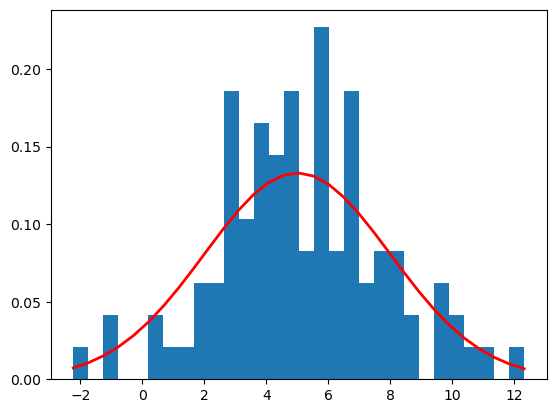

In [3]:
import matplotlib.pyplot as plt
n = 100
mu, sigma = 5, 3 # mean and standard deviation
X = np.random.normal(mu, sigma, n)
count, bins, ignored = plt.hist(X, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [4]:
q_L = X.mean() - stats.norm.ppf(0.975) * sigma / np.sqrt(n)
q_R = X.mean() + stats.norm.ppf(0.975) * sigma / np.sqrt(n)
if q_L <= mu <= q_R:
    print(True)

True


In [5]:
num_exp = 1000
ci_contains_true_mean = 0
for i in range(num_exp):
    n = 1000
    mu, sigma = 5, 3
    X = np.random.normal(mu, sigma, n)
    q_L = X.mean() - stats.norm.ppf(0.975) * sigma / np.sqrt(n)
    q_R = X.mean() + stats.norm.ppf(0.975) * sigma / np.sqrt(n)
    if q_L <= mu <= q_R:
        ci_contains_true_mean += 1

In [6]:
ci_contains_true_mean/num_exp

0.951

In [7]:
num_exp = 1000
ci_contains_true_mean = 0
for i in range(num_exp):
    n = 20
    mu, sigma = 5, 3
    X = np.random.normal(mu, sigma, n)
    sigma_hat = X.std()
    q_L = X.mean() - stats.t.ppf(0.975, n-1) * sigma_hat / np.sqrt(n)
    q_R = X.mean() + stats.t.ppf(0.975, n-1) * sigma_hat / np.sqrt(n)
    if q_L <= mu <= q_R:
        ci_contains_true_mean += 1

In [8]:
ci_contains_true_mean/num_exp

0.948

## Перцентильный бутстрэп

Один из простейших вариантов бутстрэпа.

Идея: из исходной выборки $\mathbf{X}$ генерируется $n_{boot}$ бутстрэпированных выборок. Для каждой бутстрэпированной выборки считается оценка $\hat{\theta}^*$. Полученные оценки сортируются по возрастанию, и на их основе строится гистограмма (выборочная плотность). $(1-\alpha)$-процентный доверительный интервал получается за счет отбрасывания $\dfrac{\alpha}{2} \%$ наименьших и $\dfrac{\alpha}{2} \%$ наибольших значений.

$$ \mathbb{P} \left( \hat{\theta}_{\frac{\alpha}{2}}^* \leqslant \theta \leqslant \hat{\theta}_{1-\frac{\alpha}{2}}^* \right) \approx 1 - \alpha $$

## Бутстрэп t-статистики

Идея: из исходной выборки $\mathbf{X}$ генерируется $n_{boot}$ бутстрэпированных выборок. Также на исходной выборке считается оценка $\hat{\theta}$. Для каждой бутстрэпированной выборки считается оценка $\hat{\theta}^*$ и ее стандартная ошибка $\widehat{se}(\hat{\theta}^*) = \sqrt{\dfrac{\sum_{i=1}^n (\hat{\theta}^* - \hat{\theta})^2}{n\cdot(n-1)}}$. С помощью этих оценок для каждой бутстрэпированный выборки считаем t-статистику: $t^* = \dfrac{\hat{\theta}^* - \hat{\theta}}{\widehat{se}(\hat{\theta}^*)}$. 

Полученные t-статистики сортируются по возрастанию, после отбрасывания первых $\dfrac{\alpha}{2}$ % и последних $\dfrac{\alpha}{2}$ % значений находятся соответственно левый и правый квантили: $q_L(t^*)$ и $q_R(t^*)$.

В таком случае считаем, что $q_L(t^*) \leqslant \dfrac{\hat{\theta} - \theta}{se(\hat{\theta})} \leqslant q_R(t^*) \Rightarrow \hat{\theta} - q_R(t^*) \cdot se(\hat{\theta}) \leqslant \theta \leqslant \hat{\theta} - q_L(t^*) \cdot se(\hat{\theta})$

$$\mathbb{P} \left( \hat{\theta} - q_R(t^*) \cdot se(\hat{\theta}) \leqslant \theta \leqslant \hat{\theta} - q_L(t^*) \cdot se(\hat{\theta}) \right) \approx 1 - \alpha $$

### Проведем один эксперимент

In [9]:
from random import choices
n = 100
n_boot = 1000
lambdaa = 0.1
X = np.random.exponential(scale=1/lambdaa, size=100)
X_boot = choices(X, k=n)
boot_means = []
for i in range(n_boot):
    X_boot = np.array(choices(X, k=n))
    boot_mean = X_boot.mean()
    boot_means.append(boot_mean)

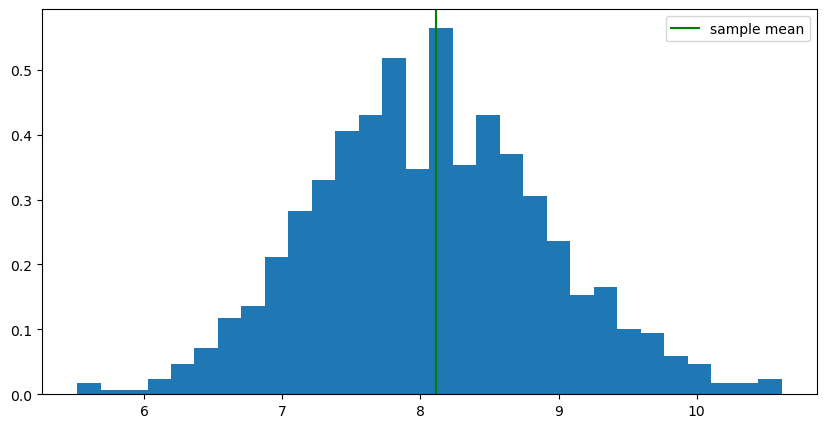

In [10]:
plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(boot_means, 30, density=True)
plt.axvline(x=X.mean(), color='green', label='sample mean')
plt.legend();

### Проведем серию экспериментов

In [11]:
np.random.seed(100)

num_exp = 100
ci_contains_true_param = 0
for i in range(num_exp):
    n = 100
    n_boot = 100
    lambdaa = 0.1
    X = np.random.exponential(scale=1/lambdaa, size=n)
    boot_means = np.zeros(n_boot)
    for i in range(n_boot):
        X_boot = np.array(choices(X, k=n))
        boot_mean = X_boot.mean()
        boot_means[i] = boot_mean
    q_L = np.quantile(boot_means, 0.025)
    q_R = np.quantile(boot_means, 0.975)
    if q_L <= 1/lambdaa <= q_R:
        ci_contains_true_param += 1
print(ci_contains_true_param/num_exp)

0.94


# Эксперименты с ЦПТ

1) Сгенерируем $n_{exp}$ выборок размером $n$ из одного распределения с фиксированным математическми ожиданием $\mu$:
$$ X = \begin{pmatrix} X^1_1 & X^1_2 & \dots & X^1_n \\ X^2_1 & X^2_2 & \dots & X^2_n \\ \vdots & \vdots & \ddots & \vdots \\ X^{n_{exp}}_1 & X^{n_{exp}}_2 & \dots & X^{n_{exp}}_n \end{pmatrix} $$ 
        
2) Для каждой выборки посчитаем выборочное среднее и выборочное стандартное отклонение:

$$ \bar{X} = \begin{pmatrix} \bar{X}_1 & \bar{X}_2 & \dots & \bar{X}_{n_{exp}} \end{pmatrix} $$

$$ \hat{\sigma} = \begin{pmatrix} \hat{\sigma}_1 & \hat{\sigma}_2 & \dots & \hat{\sigma}_{n_{exp}} \end{pmatrix} $$
                  
3) Посчитаем нижнюю и верхнюю границы доверительных интервалов:

$$ q_L = \bar{X} - z_{1-\frac{\alpha}{2}} \cdot \frac{\hat{\sigma}}{n} = \begin{pmatrix} (q_L)_1 & (q_L)_2 & \dots & (q_L)_{n_{exp}} \end{pmatrix}$$

$$ q_R = \bar{X} + z_{1-\frac{\alpha}{2}} \cdot \frac{\hat{\sigma}}{n} = \begin{pmatrix} (q_R)_1 & (q_R)_2 & \dots & (q_R)_{n_{exp}} \end{pmatrix}$$

Поскольку строим 95-процентные доверительные интервалы, везде считаем $\alpha = 0.05$. 

4) Оценим вероятность накрытия истинного математического ожидания:

$$ \hat{P}_{coverage} = \hat{\mathbb{P}} \left( q_L \leqslant \mu \leqslant q_R \right) = \frac{\sum_{i=1}^{n_{exp}} \mathbb{I} \{(q_L)_i \leqslant \mu \leqslant (q_R)_i\}}{n_{exp}}$$

Дальнейшее обозначение: $\hat{P}_{coverage} = \hat{\pi}$.

5) Также найдем стандартную ошибку оцененной вероятности для построения доверительного интервала:

$$ \hat{se} \left(\hat{\pi} \right) = \sqrt{\frac{\hat{\pi} \cdot \left(1 - \hat{\pi} \right)}{n_{exp}}}$$

$$ \mathbb{P} \left(\hat{\pi} - z_{0.975} \cdot \hat{se} \left(\hat{\pi} \right) \leqslant P_{coverage} \leqslant \hat{\pi} + z_{0.975} \cdot \hat{se} \left(\hat{\pi} \right) \right) \approx 0.95 $$.

## Нормальное распределение

In [12]:
np.random.seed(100)
def CLT_norm_dist(num_exp, sample_size, mean, std):
    
    true_mean = mean
    
    X = np.random.normal(mean, std, size = (num_exp, sample_size))
    
    sample_means = np.mean(X, axis=-1)
    sample_standard_errors = np.std(X, axis=-1)
    
    q_L = sample_means - stats.norm.ppf(0.975) * sample_standard_errors / np.sqrt(sample_size)
    q_R = sample_means + stats.norm.ppf(0.975) * sample_standard_errors / np.sqrt(sample_size)
    
    p_hat = np.mean((q_L <= true_mean) * (true_mean <= q_R))
    
    se_p_hat = np.sqrt((p_hat * (1 - p_hat)) / num_exp)
    
    return [p_hat, se_p_hat]

### Зависимость от размера выборки

In [13]:
np.random.seed(100)
sample_size = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1150, 1250, 1350, 1450, 1550, 1650, 1750, 
               1850, 1950, 2050]
num_exp = 50000
mean, std = 10, 5
CLT_experiment_results = [CLT_norm_dist(num_exp, k, mean, std) for k in sample_size]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

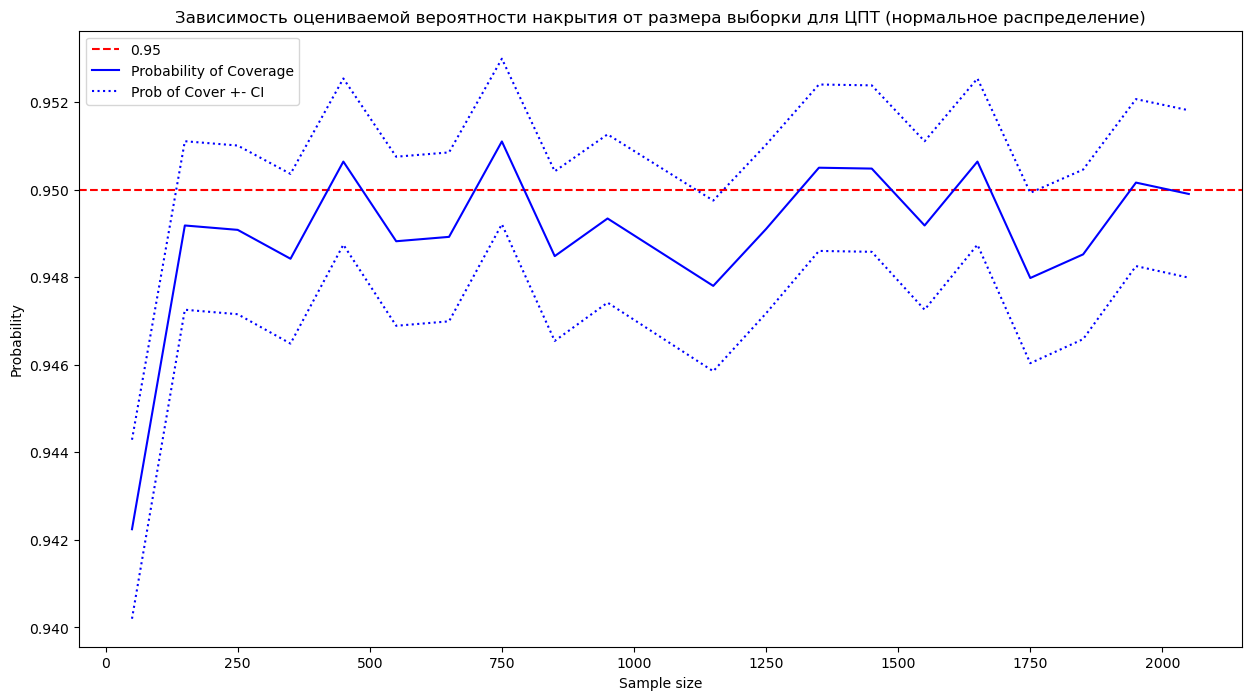

In [14]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(sample_size, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(sample_size, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(sample_size, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от размера выборки для ЦПТ (нормальное распределение)')
plt.xlabel("Sample size")
plt.ylabel("Probability")
plt.legend();

In [15]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, sample_size)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'sample_size']
df.to_csv('CLT_norm_sample_size.csv')

### Зависимость от числа экспериментов

In [16]:
np.random.seed(100)
sample_size = 1000
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
mean, std = 10, 5
CLT_experiment_results = [CLT_norm_dist(k, sample_size, mean, std) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

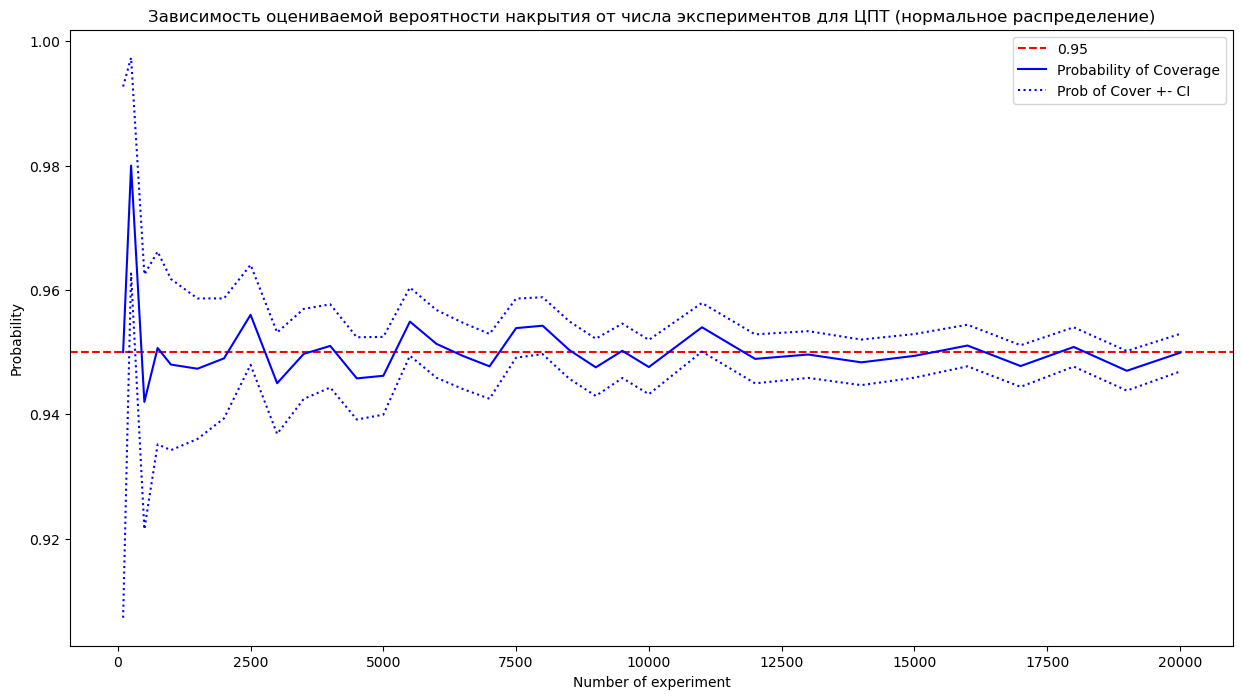

In [17]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ (нормальное распределение)')
plt.xlabel("Number of experiment")
plt.ylabel("Probability")
plt.legend();

In [18]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_norm_num_exp.csv')

### Пример "неточности" применения ЦПТ. Выборки длиной 30, 50 и 100

In [19]:
# 30 наблюдений
np.random.seed(100)
sample_size = 30
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
mean, std = 10, 5
CLT_experiment_results = [CLT_norm_dist(k, sample_size, mean, std) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

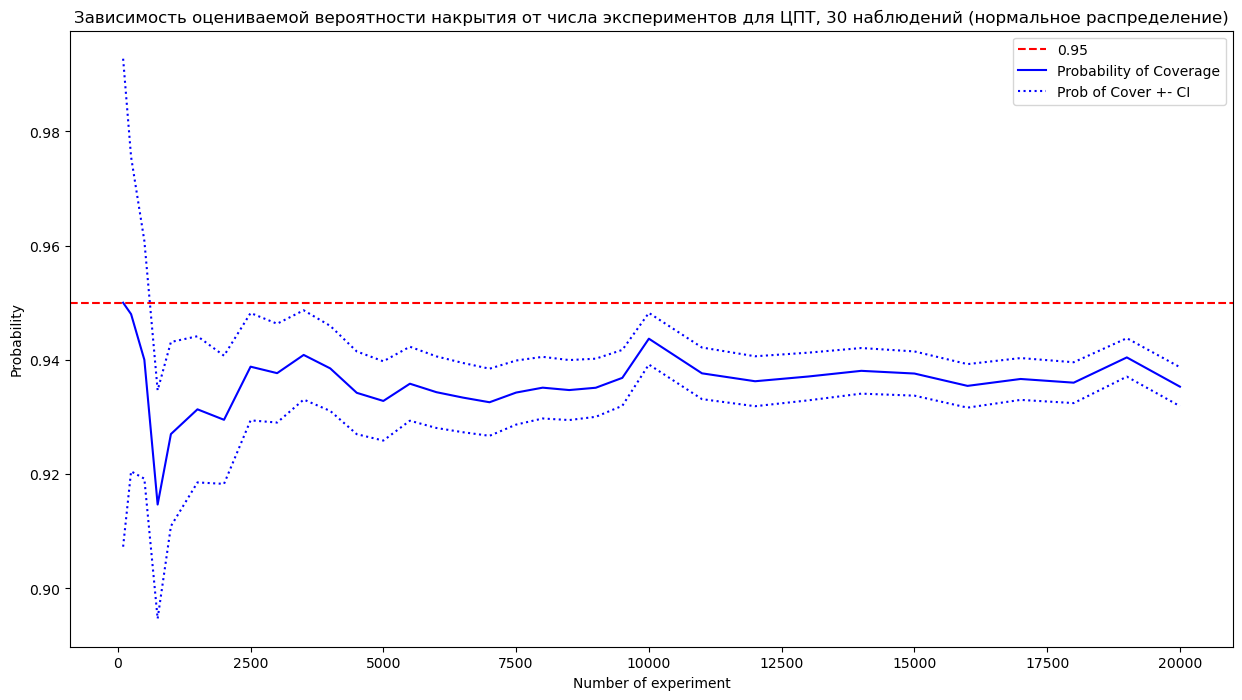

In [20]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 30 наблюдений (нормальное распределение)')
plt.xlabel("Number of experiment")
plt.ylabel("Probability") 
# plt.xscale('log')
plt.legend();

In [21]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_norm_sample_size_30.csv')

In [22]:
# 50 наблюдений
np.random.seed(100)
sample_size = 50
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
mean, std = 10, 5
CLT_experiment_results = [CLT_norm_dist(k, sample_size, mean, std) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

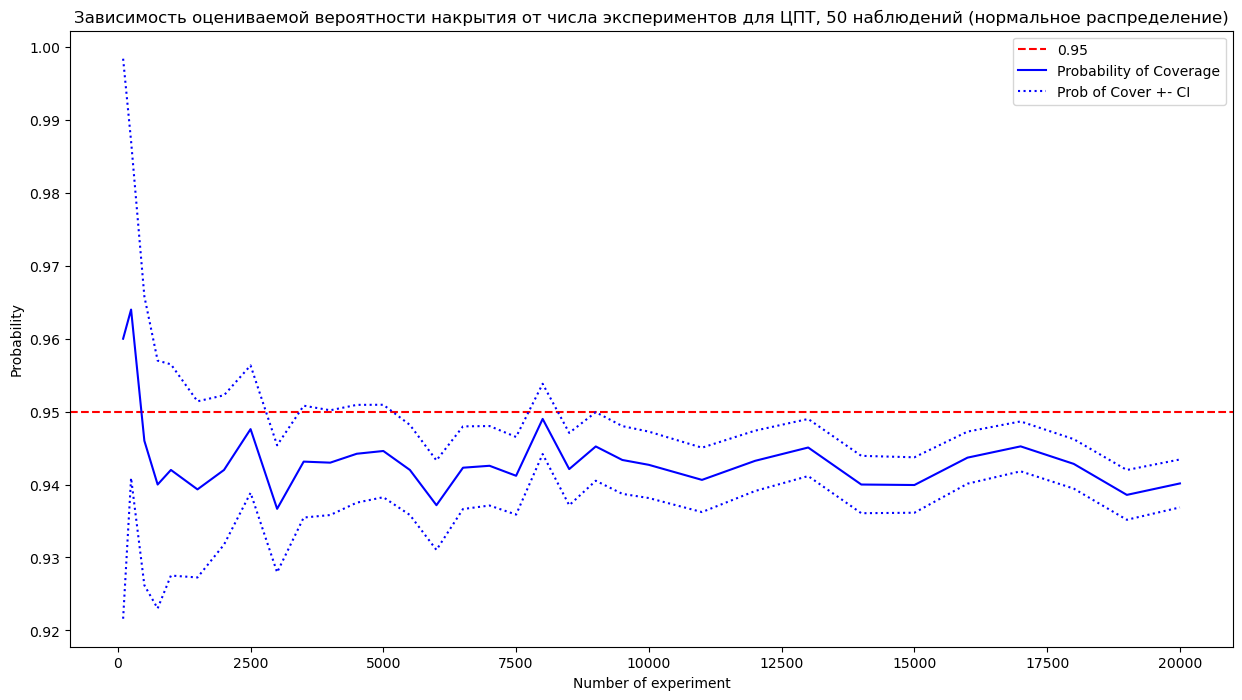

In [23]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 50 наблюдений (нормальное распределение)')
plt.xlabel("Number of experiment")
plt.ylabel("Probability") 
# plt.xscale('log')
plt.legend();

In [24]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_norm_sample_size_50.csv')

In [25]:
# 100 наблюдений
np.random.seed(100)
sample_size = 100
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
mean, std = 10, 5
CLT_experiment_results = [CLT_norm_dist(k, sample_size, mean, std) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

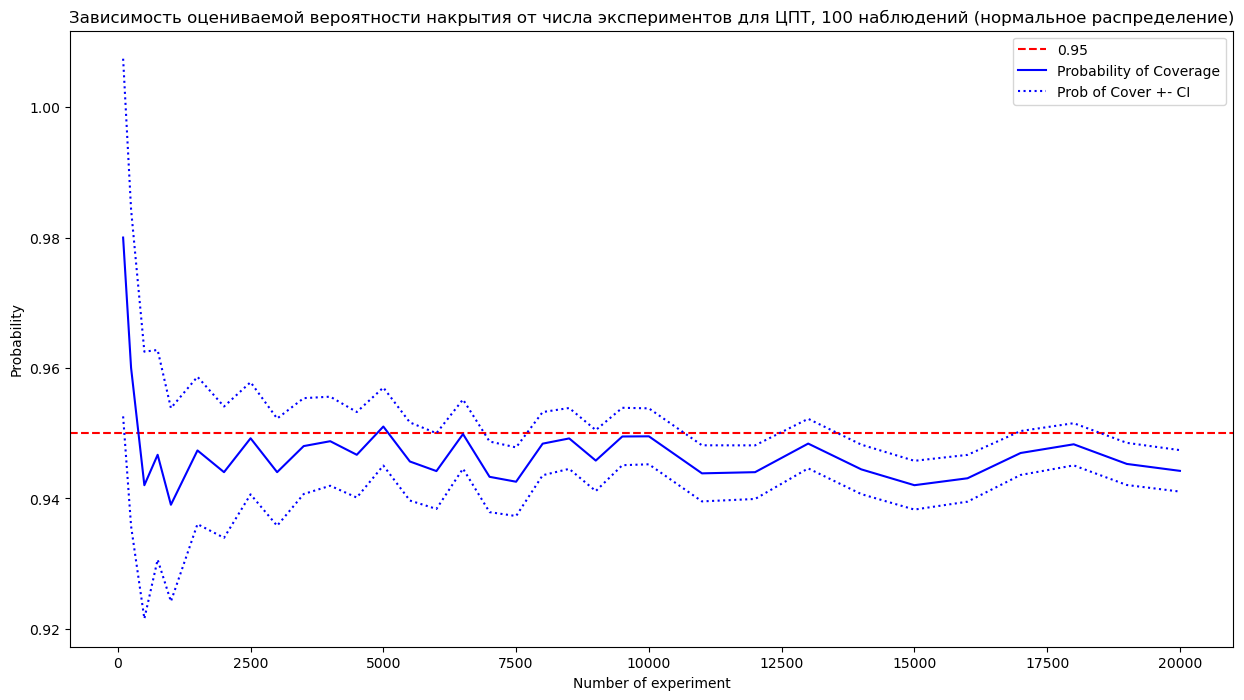

In [26]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 100 наблюдений (нормальное распределение)')
plt.xlabel("Number of experiment")
plt.ylabel("Probability") 
# plt.xscale('log')
plt.legend();

In [27]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_norm_sample_size_100.csv')

## Экспоненциальное распределение

In [28]:
np.random.seed(100)
def CLT_exp_dist(num_exp, sample_size, lambdaa):
    
    true_mean = 1/lambdaa
    
    X = np.random.exponential(scale = true_mean, size = (num_exp, sample_size))
    
    sample_means = np.mean(X, axis=-1)
    sample_standard_errors = np.std(X, axis=-1)
    
    q_L = sample_means - stats.norm.ppf(0.975) * sample_standard_errors / np.sqrt(sample_size)
    q_R = sample_means + stats.norm.ppf(0.975) * sample_standard_errors / np.sqrt(sample_size)
    
    p_hat = np.mean((q_L <= true_mean) * (true_mean <= q_R))
    
    se_p_hat = np.sqrt((p_hat * (1 - p_hat)) / num_exp)
    
    return [p_hat, se_p_hat]

### Зависимость от размера выборки

In [29]:
np.random.seed(100)
sample_size = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1150, 1250, 1350, 1450, 1550, 1650, 1750, 
               1850, 1950, 2050]
num_exp = 50000
lambdaa = 0.1
CLT_experiment_results = [CLT_exp_dist(num_exp, k, lambdaa) for k in sample_size]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

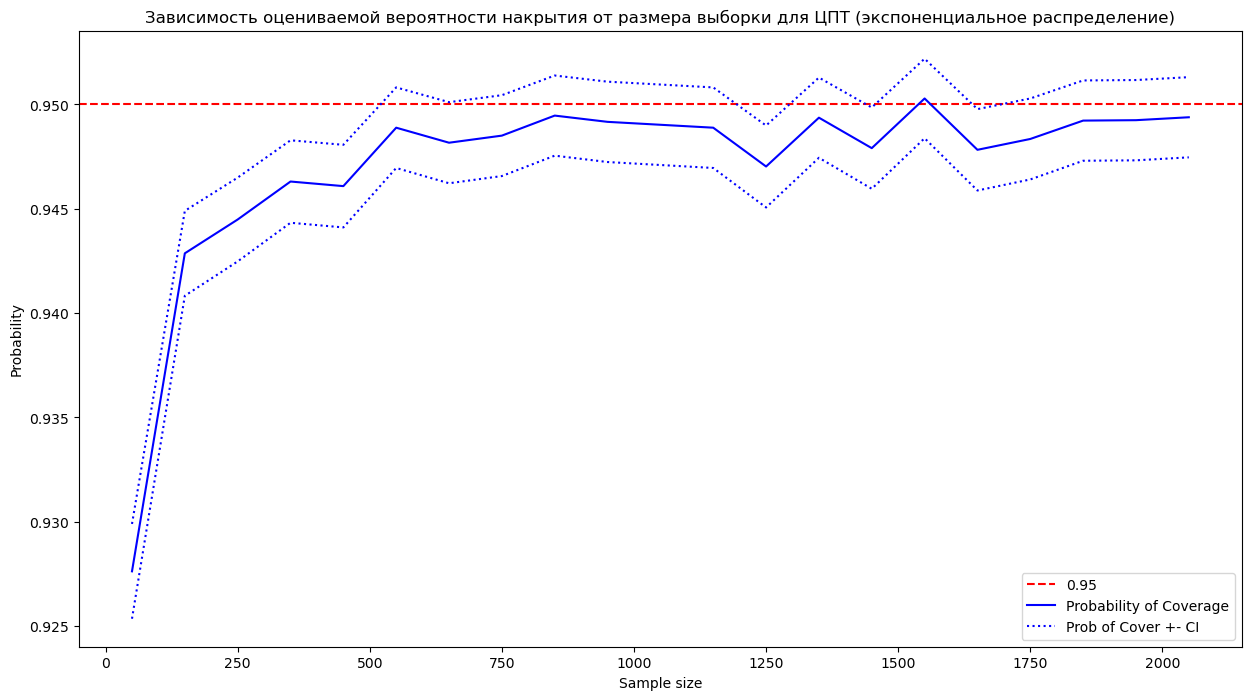

In [30]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(sample_size, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(sample_size, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(sample_size, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от размера выборки для ЦПТ (экспоненциальное распределение)')
plt.xlabel("Sample size")
plt.ylabel("Probability")
plt.legend();

In [31]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, sample_size)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'sample_size']
df.to_csv('CLT_exp_sample_size.csv')

### Зависимость от числа экспериментов

In [32]:
np.random.seed(100)
sample_size = 1000
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
CLT_experiment_results = [CLT_exp_dist(k, sample_size, lambdaa) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

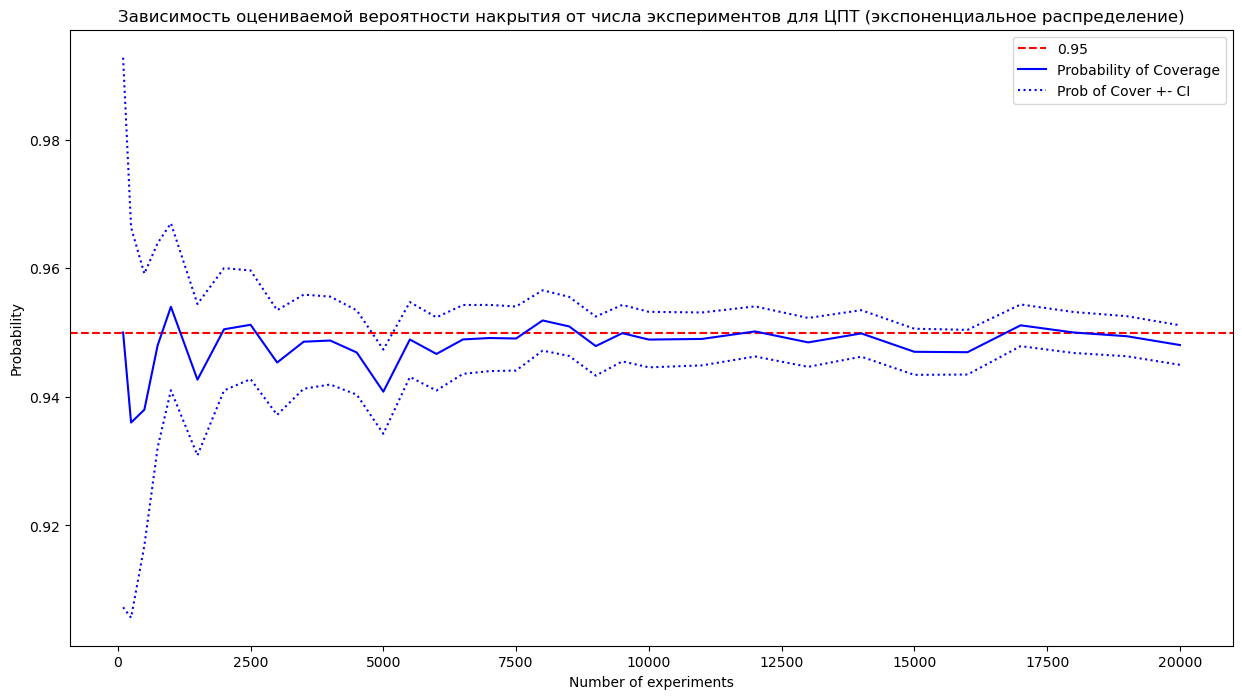

In [33]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ (экспоненциальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [34]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_exp_num_exp.csv')

### Малые выборки. Выборки длиной 30, 50 и 100.

In [35]:
# 30 наблюдений
np.random.seed(100)
sample_size = 30
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
CLT_experiment_results = [CLT_exp_dist(k, sample_size, lambdaa) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

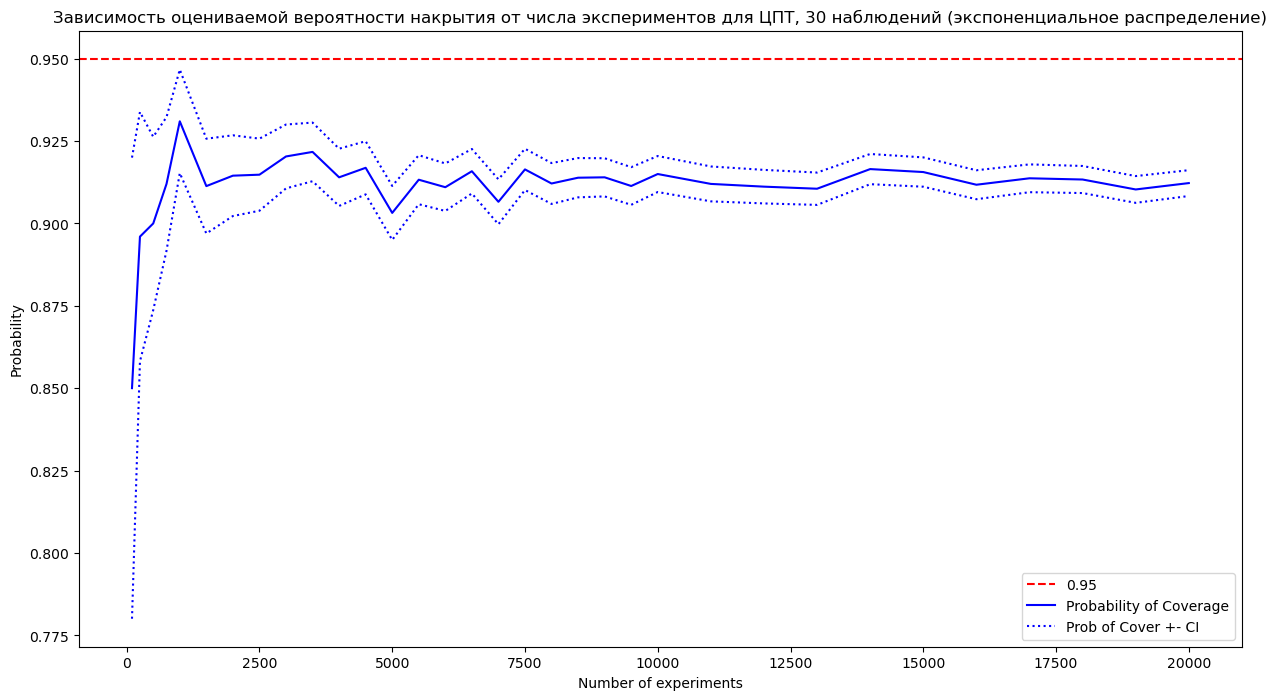

In [36]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 30 наблюдений (экспоненциальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [37]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_exp_sample_size_30.csv')

In [38]:
# 50 наблюдений
np.random.seed(100)
sample_size = 50
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
CLT_experiment_results = [CLT_exp_dist(k, sample_size, lambdaa) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

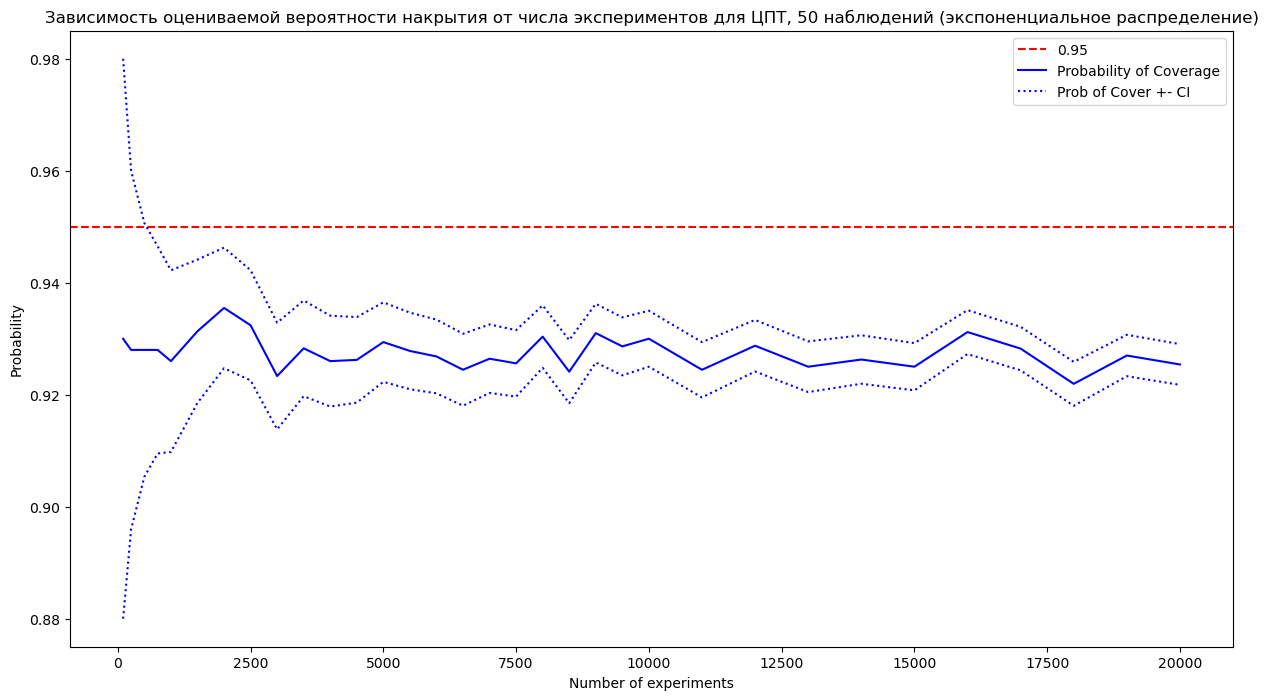

In [39]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 50 наблюдений (экспоненциальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [40]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_exp_sample_size_50.csv')

In [41]:
# 100 наблюдений
np.random.seed(100)
sample_size = 100
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
CLT_experiment_results = [CLT_exp_dist(k, sample_size, lambdaa) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

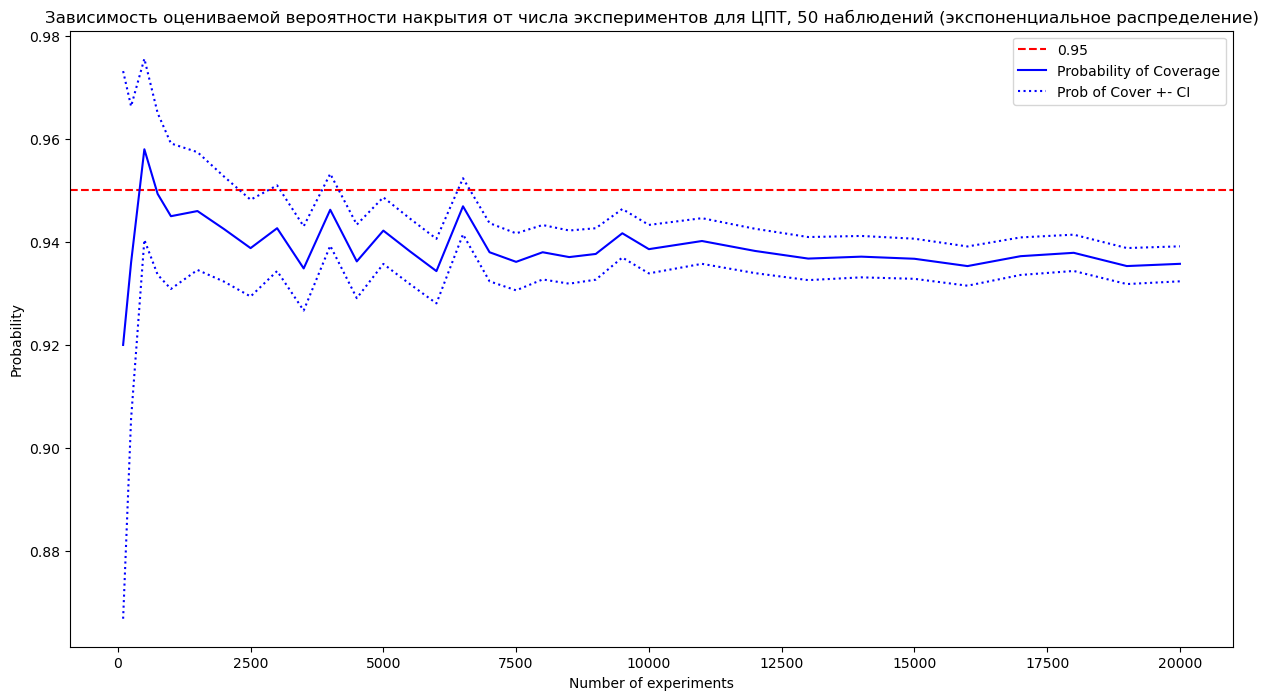

In [42]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 100 наблюдений (экспоненциальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [43]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_exp_sample_size_100.csv')

## Равномерное распределение

In [44]:
np.random.seed(100)
def CLT_unif_dist(num_exp, sample_size, low, high):
    
    true_mean = (low + high) / 2

    X = np.random.uniform(low = low, high = high, size = (num_exp, sample_size))
    
    sample_means = np.mean(X, axis=-1)
    sample_standard_errors = np.std(X, axis=-1)
    
    q_L = sample_means - stats.norm.ppf(0.975) * sample_standard_errors / np.sqrt(sample_size)
    q_R = sample_means + stats.norm.ppf(0.975) * sample_standard_errors / np.sqrt(sample_size)
    
    p_hat = np.mean((q_L <= true_mean) * (true_mean <= q_R))
    
    se_p_hat = np.sqrt((p_hat * (1 - p_hat)) / num_exp)
    
    return [p_hat, se_p_hat]

### Зависимость от размера выборки

In [45]:
np.random.seed(100)
sample_size = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1150, 1250, 1350, 1450, 1550, 1650, 1750, 
               1850, 1950, 2050]
num_exp = 50000
low, high = 0, 10

CLT_experiment_results = [CLT_unif_dist(num_exp, k, low, high) for k in sample_size]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

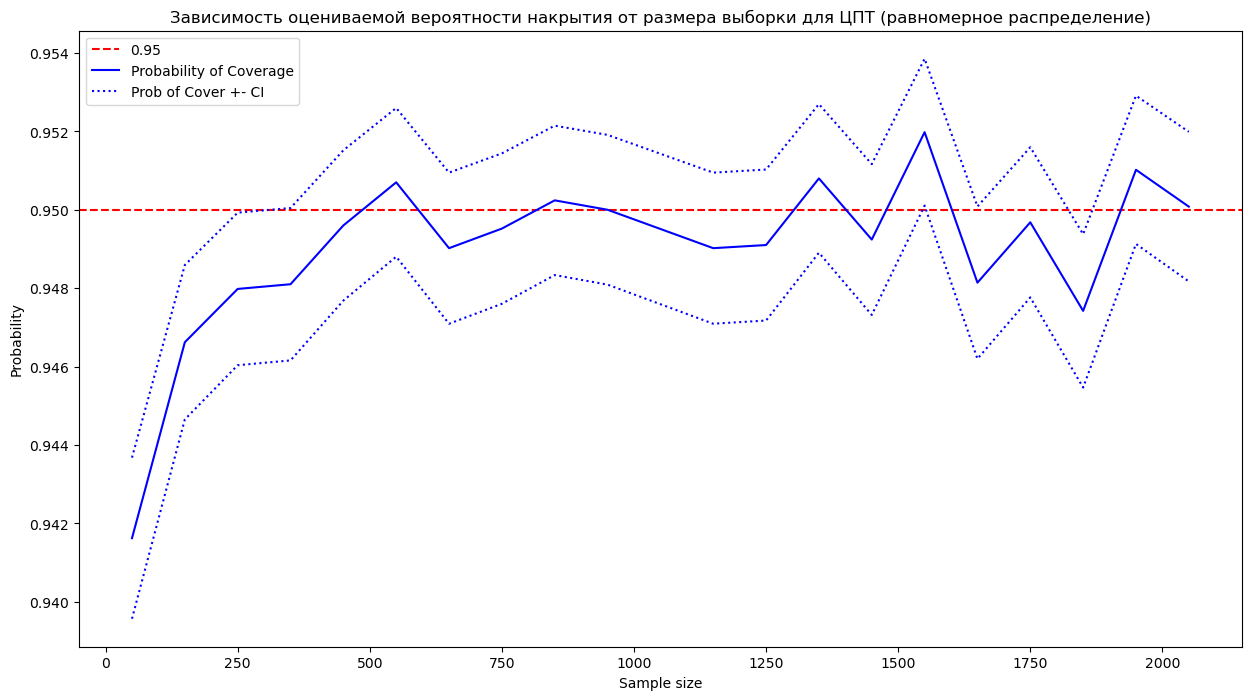

In [46]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(sample_size, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(sample_size, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(sample_size, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от размера выборки для ЦПТ (равномерное распределение)')
plt.xlabel("Sample size")
plt.ylabel("Probability")
plt.legend();

In [47]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, sample_size)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'sample_size']
df.to_csv('CLT_uniform_sample_size.csv')

### Зависимость от числа экспериментов

In [48]:
np.random.seed(100)
sample_size = 1000
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
low, high = 0, 10
CLT_experiment_results = [CLT_unif_dist(k, sample_size, low, high) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

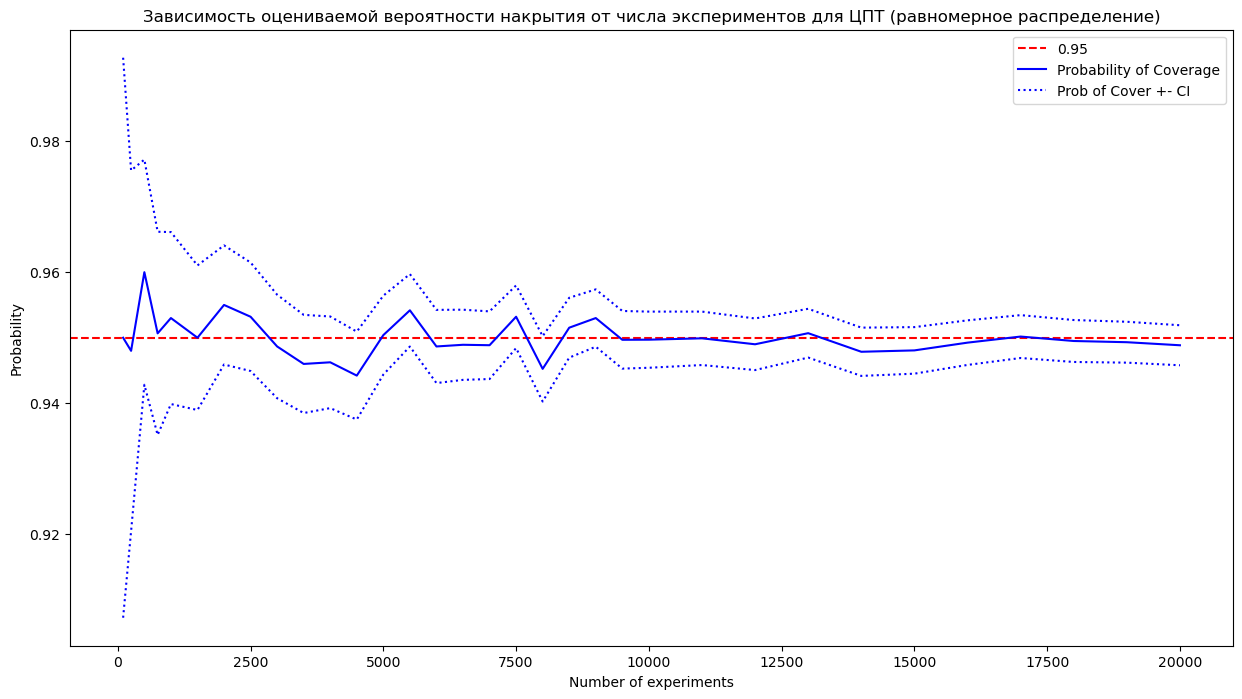

In [49]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [50]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_uniform_num_exp.csv')

### Малые выборки. Выборки длиной 30, 50 и 100

In [51]:
# 30 наблюдений
np.random.seed(100)
sample_size = 30
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
low, high = 0, 10
CLT_experiment_results = [CLT_unif_dist(k, sample_size, low, high) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

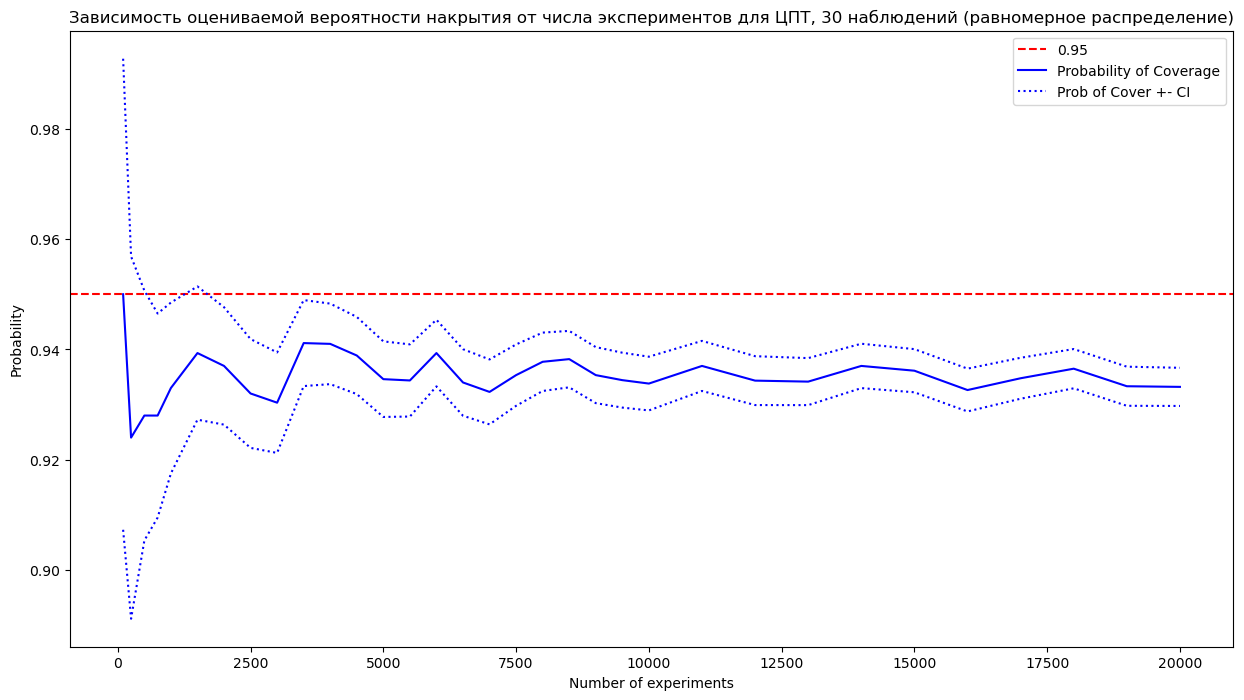

In [52]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 30 наблюдений (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [53]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_uniform_sample_size_30.csv')

In [54]:
# 50 наблюдений
np.random.seed(100)
sample_size = 50
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
low, high = 0, 10
CLT_experiment_results = [CLT_unif_dist(k, sample_size, low, high) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

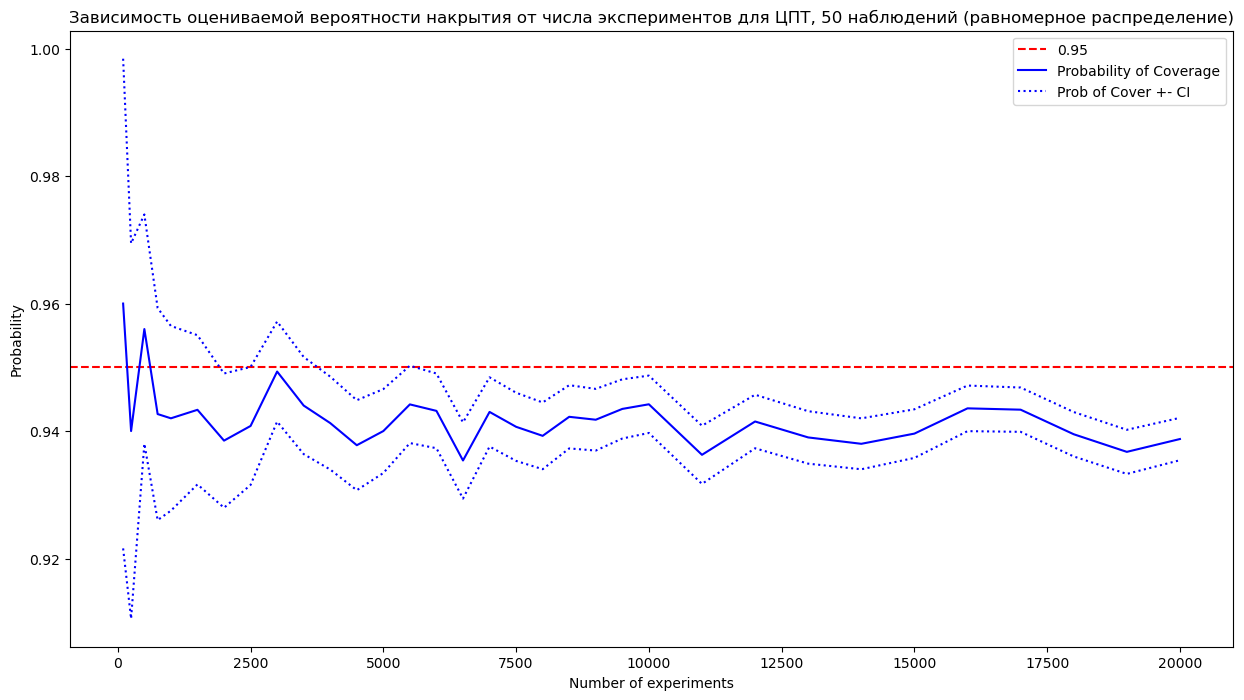

In [55]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 50 наблюдений (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [56]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_uniform_sample_size_50.csv')

In [57]:
# 100 наблюдений
np.random.seed(100)
sample_size = 100
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
low, high = 0, 10
CLT_experiment_results = [CLT_unif_dist(k, sample_size, low, high) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

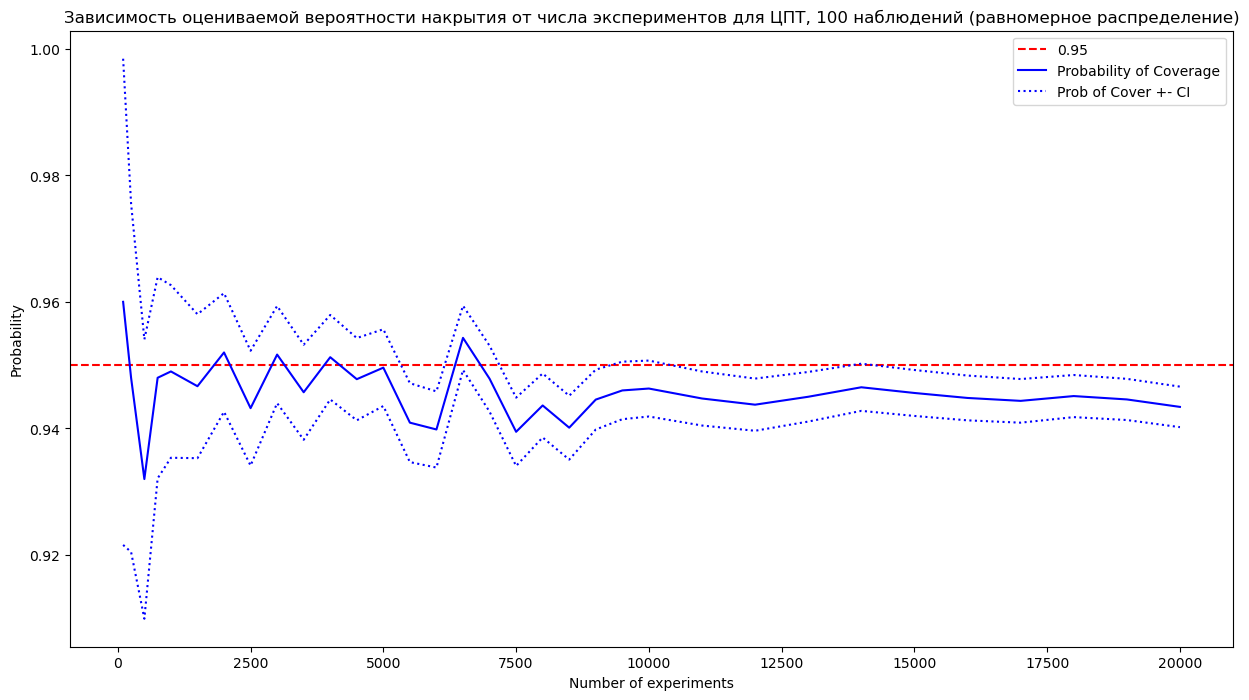

In [58]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 100 наблюдений (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [59]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_uniform_sample_size_100.csv')

## Хи-квадрат распределение

In [60]:
np.random.seed(100)
def CLT_chi2_dist(num_exp, sample_size, df):
    
    true_mean = df

    X = np.random.chisquare(df, size = (num_exp, sample_size))
    
    sample_means = np.mean(X, axis=-1)
    sample_standard_errors = np.std(X, axis=-1)
    
    q_L = sample_means - stats.norm.ppf(0.975) * sample_standard_errors / np.sqrt(sample_size)
    q_R = sample_means + stats.norm.ppf(0.975) * sample_standard_errors / np.sqrt(sample_size)
    
    p_hat = np.mean((q_L <= true_mean) * (true_mean <= q_R))
    
    se_p_hat = np.sqrt((p_hat * (1 - p_hat)) / num_exp)
    
    return [p_hat, se_p_hat]

### Зависимость от размера выборки

In [61]:
np.random.seed(100)
sample_size = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1150, 1250, 1350, 1450, 1550, 1650, 1750, 
               1850, 1950, 2050]
num_exp = 50000
df = 10
CLT_experiment_results = [CLT_chi2_dist(num_exp, k, df) for k in sample_size]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

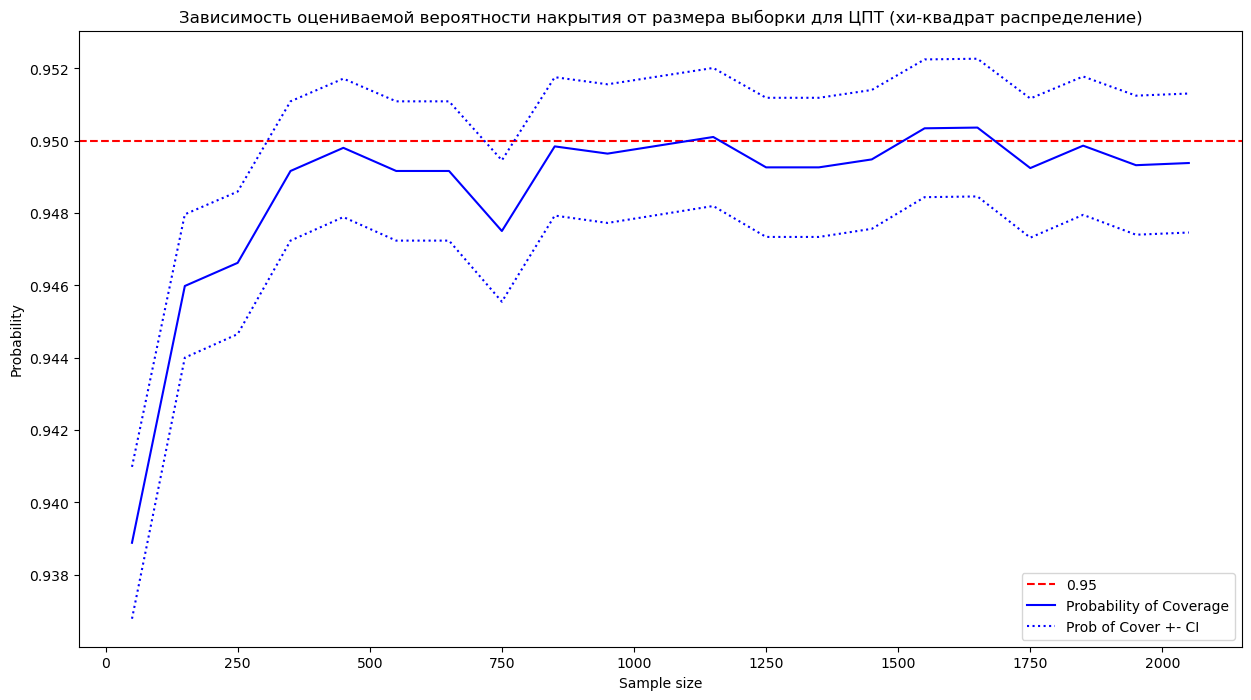

In [62]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(sample_size, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(sample_size, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(sample_size, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от размера выборки для ЦПТ (хи-квадрат распределение)')
plt.xlabel("Sample size")
plt.ylabel("Probability")
plt.legend();

In [63]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, sample_size)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'sample_size']
df.to_csv('CLT_chi2_sample_size.csv')

### Зависимость от числа экспериментов

In [64]:
np.random.seed(100)
sample_size = 1000
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
df = 10
CLT_experiment_results = [CLT_chi2_dist(k, sample_size, df) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

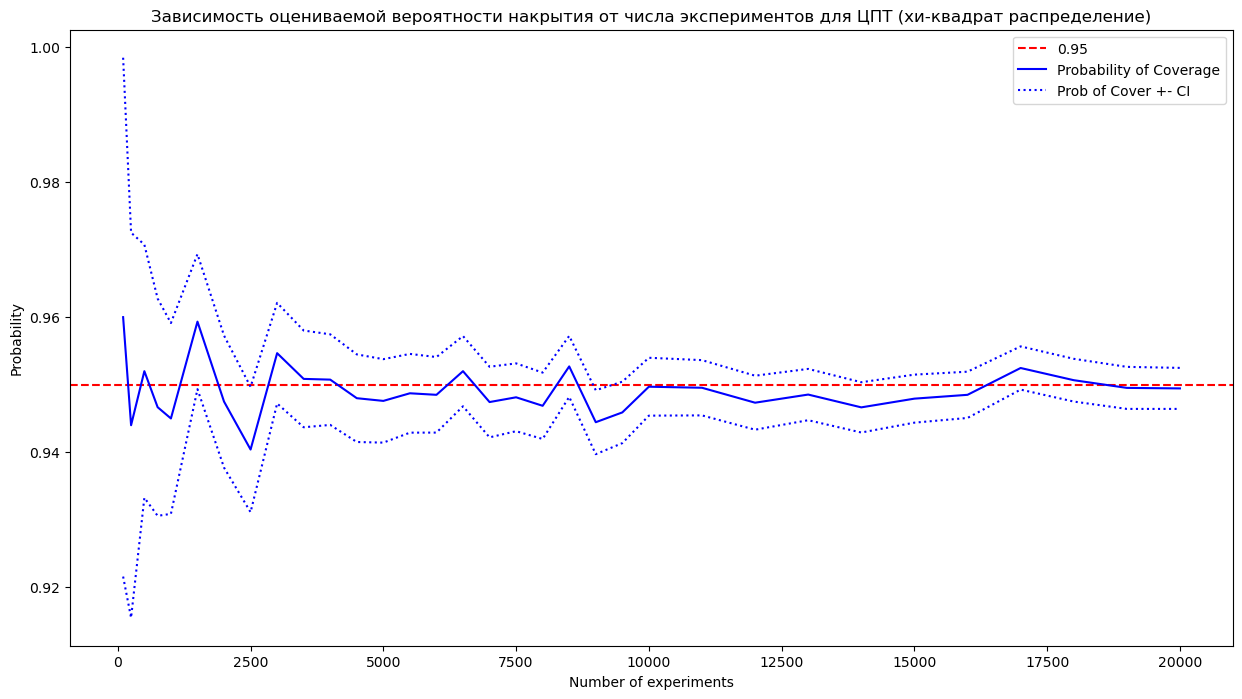

In [65]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ (хи-квадрат распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [66]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_chi2_num_exp.csv')

### Малые выборки. Выборки длиной 30, 50 и 100.

In [67]:
# 30 наблюдений
np.random.seed(100)
sample_size = 30
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
df = 10
CLT_experiment_results = [CLT_chi2_dist(k, sample_size, df) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

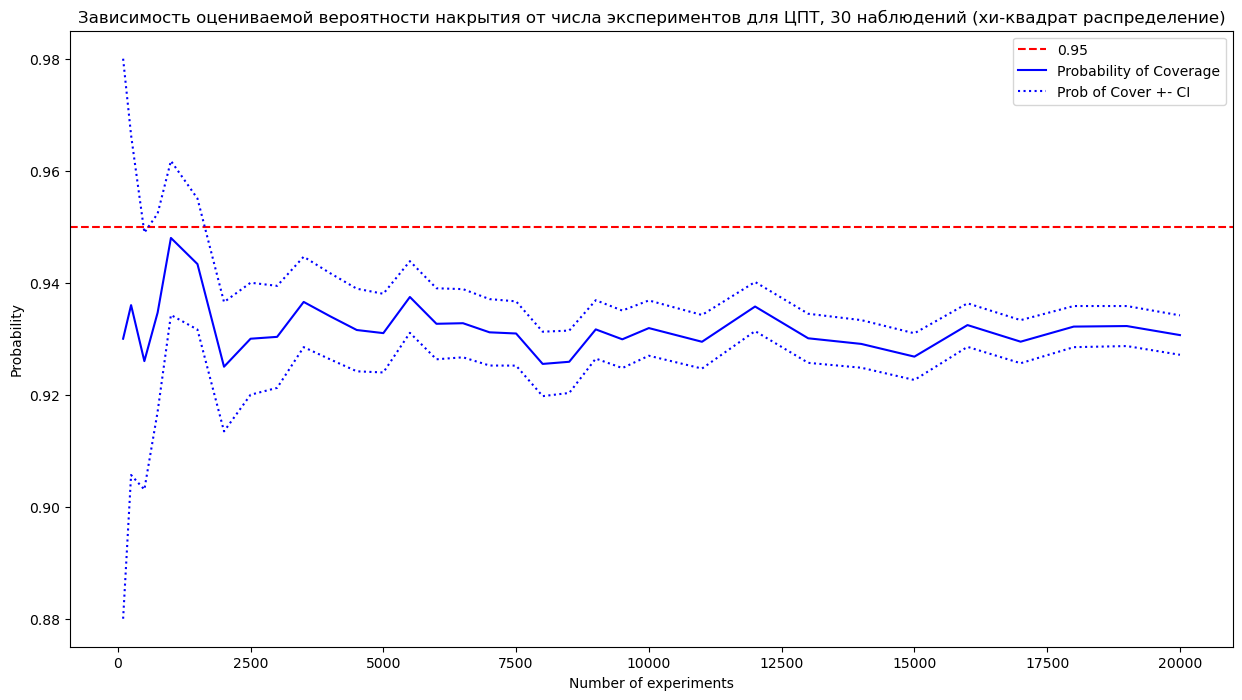

In [68]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 30 наблюдений (хи-квадрат распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [69]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_chi2_sample_size_30.csv')

In [70]:
# 50 наблюдений
np.random.seed(100)
sample_size = 50
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
df = 10
CLT_experiment_results = [CLT_chi2_dist(k, sample_size, df) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

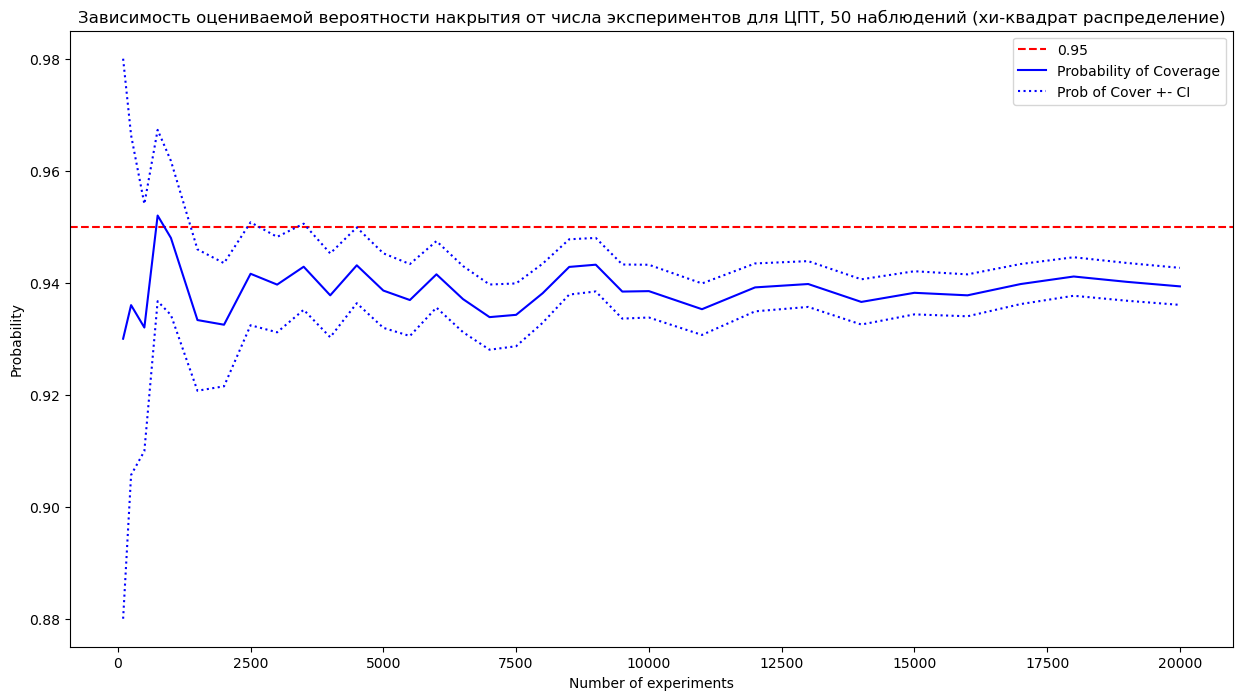

In [71]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 50 наблюдений (хи-квадрат распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [72]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_chi2_sample_size_50.csv')

In [73]:
# 100 наблюдений
np.random.seed(100)
sample_size = 100
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
df = 10
CLT_experiment_results = [CLT_chi2_dist(k, sample_size, df) for k in num_exp]

p_hat = np.array(CLT_experiment_results)[:, 0]
se_p_hat = np.array(CLT_experiment_results)[:, 1]

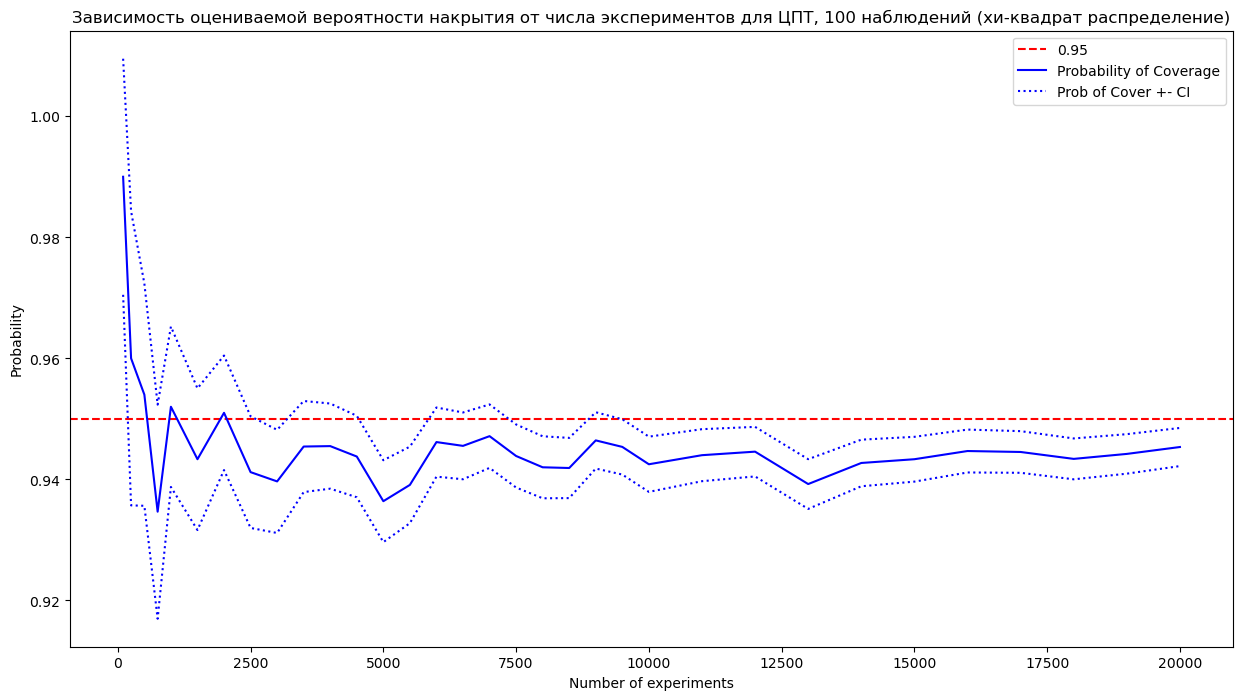

In [74]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для ЦПТ, 100 наблюдений (хи-квадрат распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [75]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('CLT_chi2_sample_size_100.csv')

# Перцентильный бутстрэп

In [256]:
np.random.seed(100)
def percentile_bootstrap(sample, n_boot=10000):
    n = len(sample)
    boot_means = np.zeros(n_boot)
    for i in range(n_boot):
        x_boot = np.array(choices(sample, k=n))
        boot_mean = np.mean(x_boot)
        boot_means[i] = boot_mean
    q_L, q_R = np.quantile(boot_means, 0.025), np.quantile(boot_means, 0.975)
    return [q_L, q_R]

## Нормальное распределение

In [257]:
np.random.seed(100)
def percentile_bootstrap_norm_dist(num_exp, sample_size, mean, std):

    n = sample_size
    true_mean = mean
    
    X = np.random.normal(mean, std, size = (num_exp, sample_size))
    
    CI_matrix = np.apply_along_axis(percentile_bootstrap, 1, X)
    q_L, q_R = CI_matrix[:, 0], CI_matrix[:, 1]

    p_hat = np.mean((q_L <= true_mean) * (true_mean <= q_R))
    se_p_hat = np.sqrt((p_hat * (1 - p_hat)) / num_exp)
    
    return [p_hat, se_p_hat]

### Зависимость от размера выборки

In [ ]:
np.random.seed(100)
sample_size = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1500]
num_exp = 10000
mean, std = 10, 5
Bootstrap_experiment_results = [percentile_bootstrap_norm_dist(num_exp, k, mean, std) for k in tqdm(sample_size)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

In [ ]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(sample_size, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(sample_size, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(sample_size, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от размера выборки для перцентильного бутстрэпа (нормальное распределение)')
plt.xlabel("Sample size")
plt.ylabel("Probability")
plt.legend();

In [ ]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, sample_size)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'sample_size']
df.to_csv('Percentile_norm_sample_size.csv')

### Зависимость от числа экспериментов

In [ ]:
np.random.seed(100)
sample_size = 1000
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
mean, std = 10, 5
Bootstrap_experiment_results = [percentile_bootstrap_norm_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

In [ ]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для перцентильного бутстрэпа (нормальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [ ]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Percentile_norm_num_exp.csv')

### Выборки длиной 30, 50 и 100.

In [ ]:
# 30 наблюдений
np.random.seed(100)
sample_size = 30
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
mean, std = 10, 5
Bootstrap_experiment_results = [percentile_bootstrap_norm_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

In [ ]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для перцентильного бутстрэпа, 30 наблюдений (нормальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [ ]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Percentile_norm_sample_size_30.csv')

In [ ]:
# 50 наблюдений
np.random.seed(100)
sample_size = 50
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
mean, std = 10, 5
Bootstrap_experiment_results = [percentile_bootstrap_norm_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

In [ ]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для перцентильного бутстрэпа, 50 наблюдений (нормальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [ ]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Percentile_norm_sample_size_50.csv')

In [ ]:
# 100 наблюдений
np.random.seed(100)
sample_size = 100
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
mean, std = 10, 5
Bootstrap_experiment_results = [percentile_bootstrap_norm_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

In [ ]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для перцентильного бутстрэпа, 100 наблюдений (нормальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [ ]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Percentile_norm_sample_size_100.csv')

## Равномерное распределение

In [68]:
np.random.seed(100)
def percentile_bootstrap_uniform_dist(num_exp, sample_size, low, high):

    true_mean = (low + high) / 2
    
    X = np.random.uniform(low = low, high = high, size = (num_exp, sample_size))
    
    CI_matrix = np.apply_along_axis(percentile_bootstrap, 1, X)
    q_L, q_R = CI_matrix[:, 0], CI_matrix[:, 1]

    p_hat = np.mean((q_L <= true_mean) * (true_mean <= q_R))
    se_p_hat = np.sqrt((p_hat * (1 - p_hat)) / num_exp)
    
    return [p_hat, se_p_hat]

### Зависимость от размера выборки

In [69]:
np.random.seed(100)
sample_size = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1500]
num_exp = 10000
low, hipe = 0, 10
Bootstrap_experiment_results = [percentile_bootstrap_uniform_dist(num_exp, k, low, high) for k in tqdm(sample_size)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

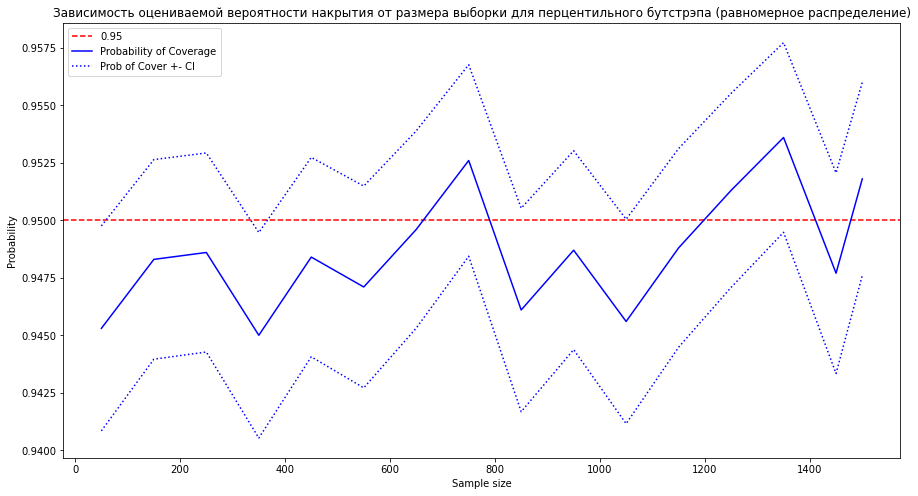

In [70]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(sample_size, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(sample_size, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(sample_size, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от размера выборки для перцентильного бутстрэпа (равномерное распределение)')
plt.xlabel("Sample size")
plt.ylabel("Probability")
plt.legend();

In [71]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, sample_size)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'sample_size']
df.to_csv('Percentile_uniform_sample_size.csv')

### Зависимость от числа экспериментов

In [72]:
np.random.seed(100)
sample_size = 1000
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
low, hipe = 0, 10
Bootstrap_experiment_results = [percentile_bootstrap_uniform_dist(k, sample_size, low, high) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

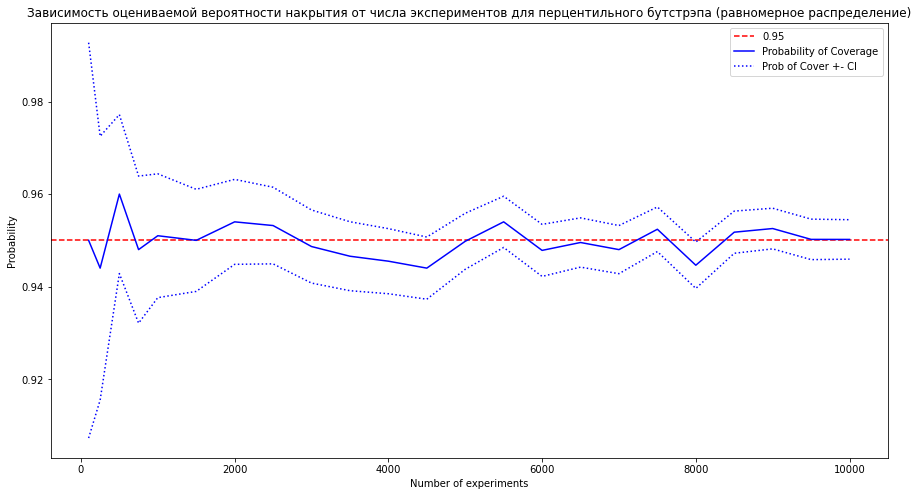

In [73]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для перцентильного бутстрэпа (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [74]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Percentile_uniform_num_exp.csv')

### Выборки длиной 30, 50 и 100

In [ ]:
# 30 наблюдений
np.random.seed(100)
sample_size = 30
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
low, hipe = 0, 10
Bootstrap_experiment_results = [percentile_bootstrap_uniform_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

In [ ]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для перцентильного бутстрэпа, 30 наблюдений (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [ ]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Percentile_uniform_sample_size_30.csv')

In [ ]:
# 50 наблюдений
np.random.seed(100)
sample_size = 50
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
low, hipe = 0, 10
Bootstrap_experiment_results = [percentile_bootstrap_uniform_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

In [ ]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для перцентильного бутстрэпа, 50 наблюдений (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [ ]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Percentile_uniform_sample_size_50.csv')

In [ ]:
# 100 наблюдений
np.random.seed(100)
sample_size = 100
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
low, hipe = 0, 10
Bootstrap_experiment_results = [percentile_bootstrap_uniform_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

In [ ]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для перцентильного бутстрэпа, 100 наблюдений (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [ ]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Percentile_uniform_sample_size_100.csv')

# Стьюдентизированный бутстрэп (бутстрэп t-статистики)

In [76]:
np.random.seed(100)
def studentized_bootstrap(sample, n_boot=10000):
    n = len(sample)
    t_stars = np.zeros(n_boot)
    for i in range(n_boot):
        x_boot = np.array(choices(sample, k=n))
        boot_mean = np.mean(x_boot)
        boot_std = np.std(x_boot)
        t_star = (np.mean(sample) - boot_mean) / (boot_std / np.sqrt(n))
        t_stars[i] = t_star
    q_L = np.quantile(t_stars, 0.025)
    q_R = np.quantile(t_stars, 0.975)
    lower_bound = np.mean(sample) - q_R * np.std(sample) / np.sqrt(n)
    upper_bound = np.mean(sample) - q_L * np.std(sample) / np.sqrt(n)
    return [lower_bound, upper_bound]

## Нормальное распределение

In [77]:
np.random.seed(100)
def studentized_bootstrap_norm_dist(num_exp, sample_size, mean, std):

    n = sample_size
    true_mean = mean
    
    X = np.random.normal(mean, std, size = (num_exp, sample_size))
    
    CI_matrix = np.apply_along_axis(studentized_bootstrap, 1, X)
    q_L, q_R = CI_matrix[:, 0], CI_matrix[:, 1]

    p_hat = np.mean((q_L <= true_mean) * (true_mean <= q_R))
    se_p_hat = np.sqrt((p_hat * (1 - p_hat)) / num_exp)
    
    return [p_hat, se_p_hat]

### Зависимость от размера выборки

In [78]:
np.random.seed(100)
sample_size = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1500]
num_exp = 10000
mean, std = 10, 5
Bootstrap_experiment_results = [studentized_bootstrap_norm_dist(num_exp, k, mean, std) for k in tqdm(sample_size)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

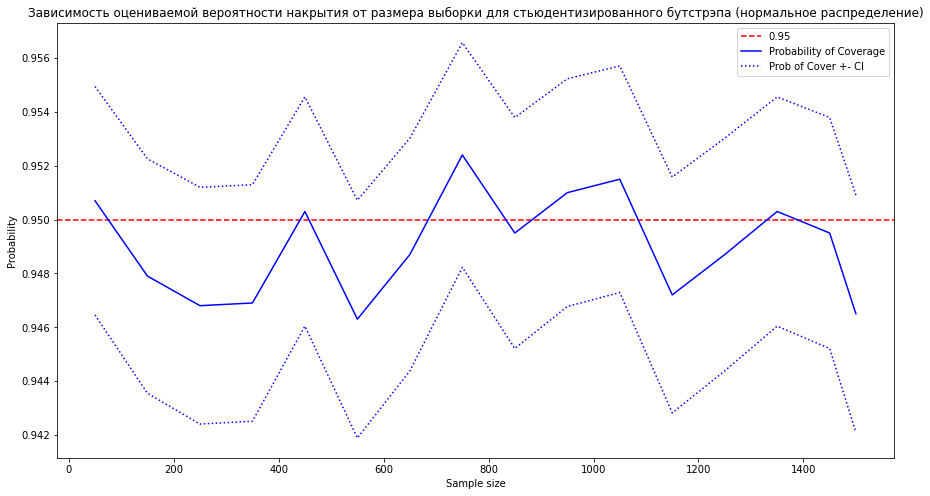

In [79]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(sample_size, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(sample_size, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(sample_size, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от размера выборки для стьюдентизированного бутстрэпа (нормальное распределение)')
plt.xlabel("Sample size")
plt.ylabel("Probability")
plt.legend();

In [80]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, sample_size)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'sample_size']
df.to_csv('Studentized_norm_sample_size.csv')

### Зависимость от числа экспериментов

In [70]:
np.random.seed(100)
sample_size = 1000
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
mean, std = 10, 5
Bootstrap_experiment_results = [studentized_bootstrap_norm_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

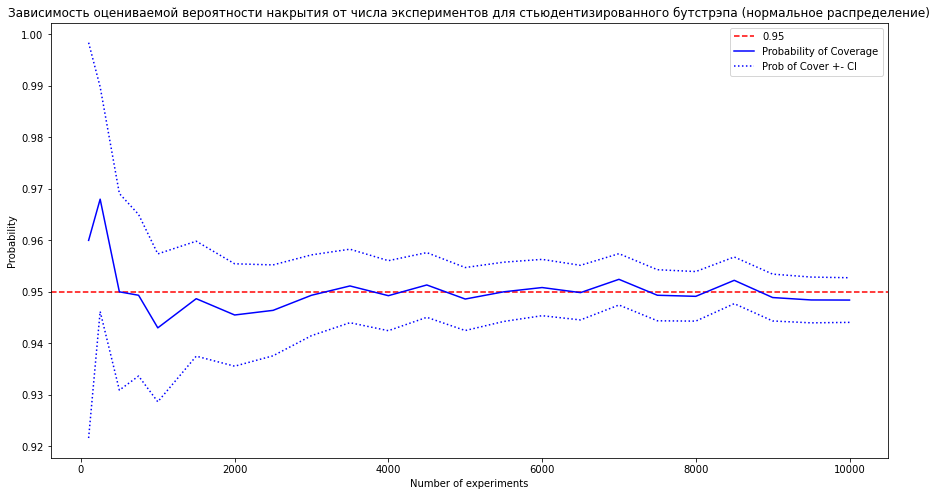

In [71]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для стьюдентизированного бутстрэпа (нормальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [72]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Studentized_norm_num_exp.csv')

### Выборки длиной 30, 50 и 100

In [291]:
np.random.seed(100)
sample_size = 30
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
mean, std = 10, 5
Bootstrap_experiment_results = [studentized_bootstrap_norm_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

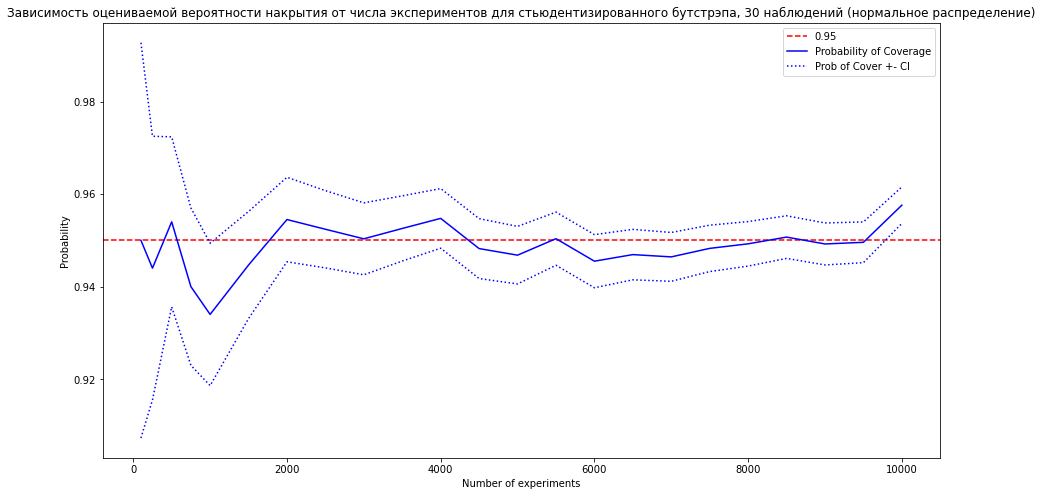

In [292]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для стьюдентизированного бутстрэпа, 30 наблюдений (нормальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [293]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Studentized_norm_sample_size_30.csv')

In [294]:
np.random.seed(100)
sample_size = 50
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
mean, std = 10, 5
Bootstrap_experiment_results = [studentized_bootstrap_norm_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

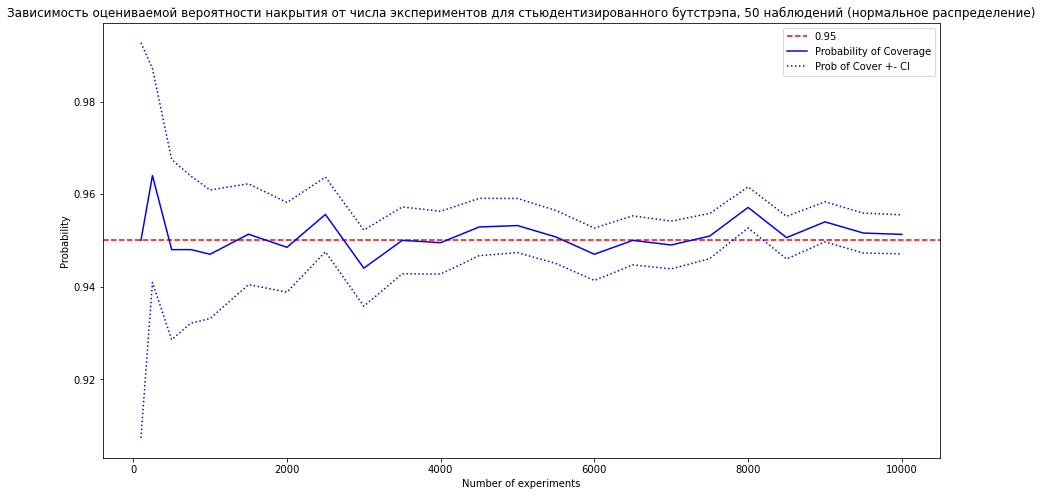

In [295]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для стьюдентизированного бутстрэпа, 50 наблюдений (нормальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [296]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Studentized_norm_sample_size_50.csv')

In [297]:
np.random.seed(100)
sample_size = 100
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
mean, std = 10, 5
Bootstrap_experiment_results = [studentized_bootstrap_norm_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

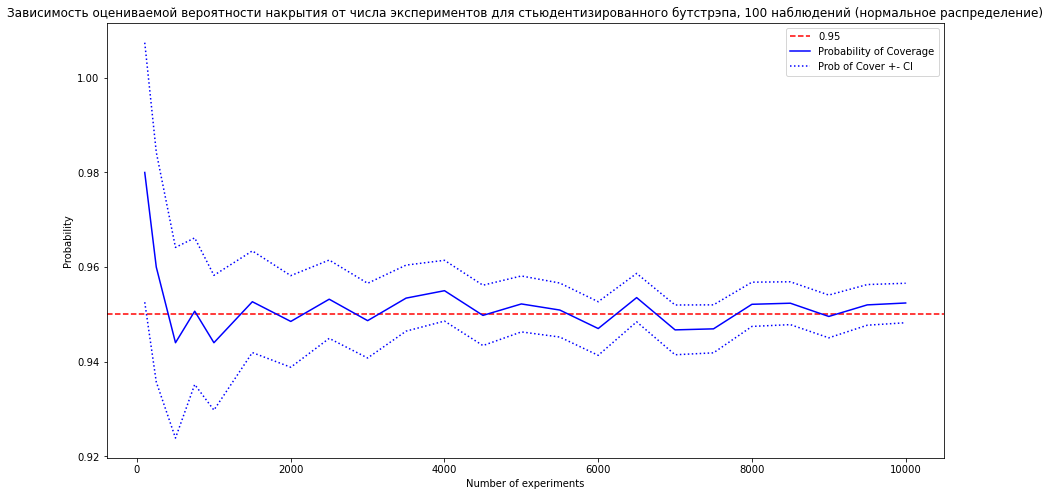

In [298]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для стьюдентизированного бутстрэпа, 100 наблюдений (нормальное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [299]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Studentized_norm_sample_size_100.csv')

## Равномерное распределение

In [165]:
np.random.seed(100)
def studentized_bootstrap_uniform_dist(num_exp, sample_size, low, high):

    true_mean = (low + high) / 2
    
    X = np.random.uniform(low = low, high = high, size = (num_exp, sample_size))
    
    CI_matrix = np.apply_along_axis(studentized_bootstrap, 1, X)
    q_L, q_R = CI_matrix[:, 0], CI_matrix[:, 1]

    p_hat = np.mean((q_L <= true_mean) * (true_mean <= q_R))
    se_p_hat = np.sqrt((p_hat * (1 - p_hat)) / num_exp)
    
    return [p_hat, se_p_hat]

### Зависимость от размера выборки

In [166]:
np.random.seed(100)
sample_size = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1500]
num_exp = 10000
low, hipe = 0, 10
Bootstrap_experiment_results = [studentized_bootstrap_uniform_dist(num_exp, k, low, high) for k in tqdm(sample_size)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

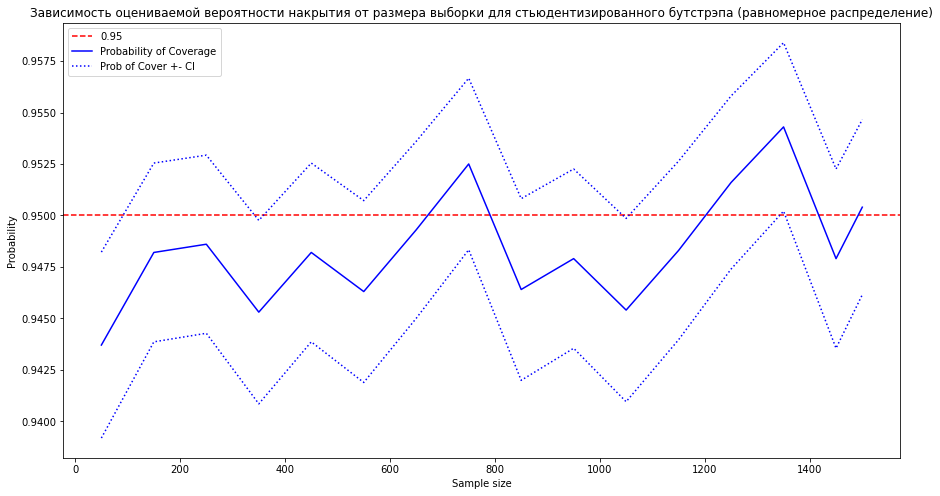

In [167]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(sample_size, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(sample_size, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(sample_size, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от размера выборки для стьюдентизированного бутстрэпа (равномерное распределение)')
plt.xlabel("Sample size")
plt.ylabel("Probability")
plt.legend();

In [168]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, sample_size)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'sample_size']
df.to_csv('Studentized_uniform_sample_size.csv')

### Зависимость от числа экспериментов

In [169]:
np.random.seed(100)
sample_size = 1000
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
low, hipe = 0, 10
Bootstrap_experiment_results = [studentized_bootstrap_uniform_dist(k, sample_size, low, high) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

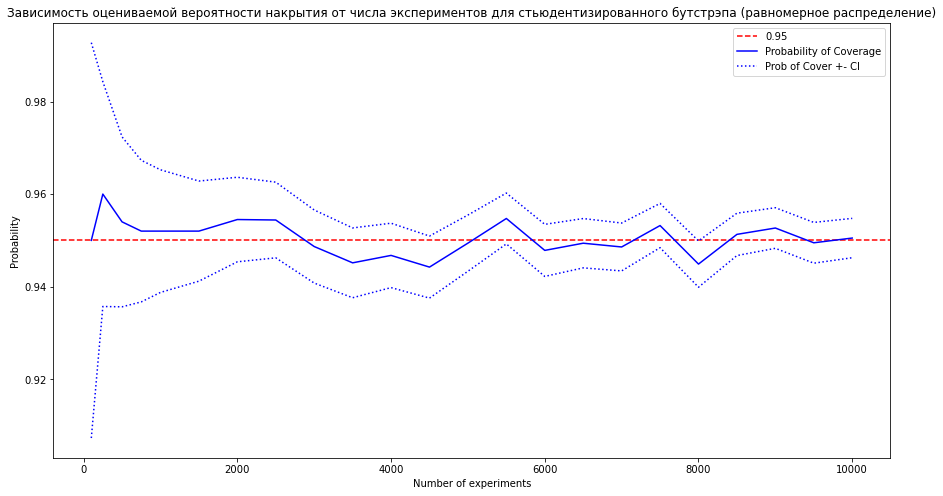

In [170]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для стьюдентизированного бутстрэпа (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [171]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Studentized_uniform_num_exp.csv')

### Выборки длиной 30, 50 и 100

In [172]:
# 30 наблюдений
np.random.seed(100)
sample_size = 30
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
low, hipe = 0, 10
Bootstrap_experiment_results = [studentized_bootstrap_uniform_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

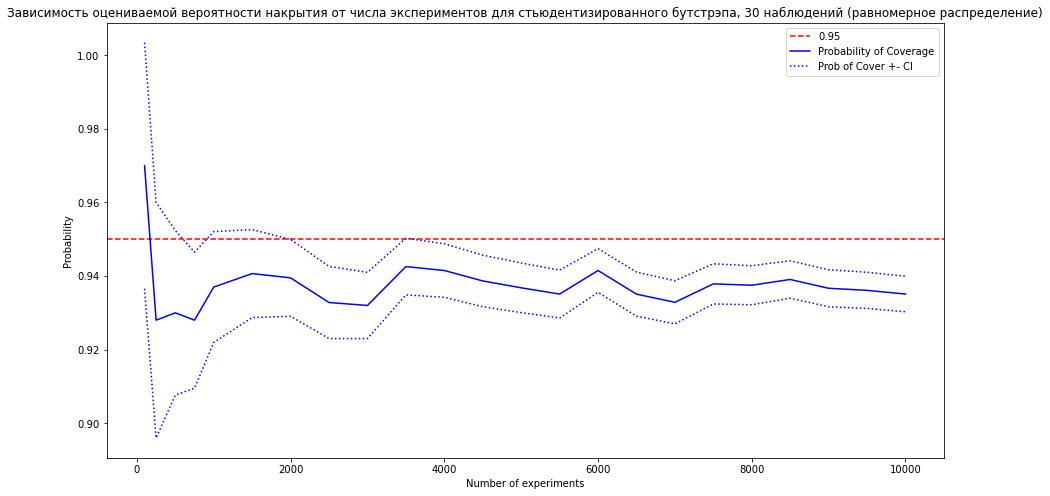

In [173]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для стьюдентизированного бутстрэпа, 30 наблюдений (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [174]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Studentized_uniform_sample_size_30.csv')

In [175]:
# 50 наблюдений
np.random.seed(100)
sample_size = 50
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
low, hipe = 0, 10
Bootstrap_experiment_results = [studentized_bootstrap_uniform_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

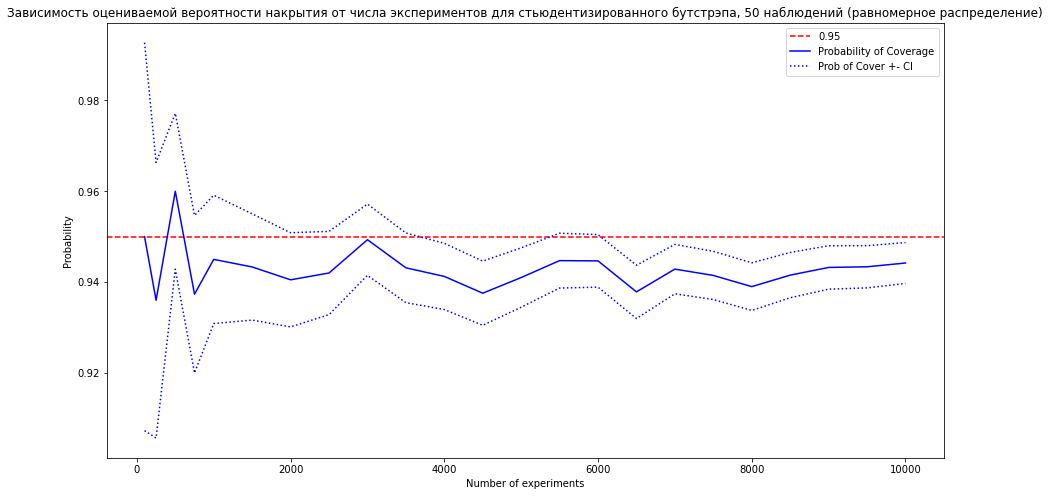

In [176]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для стьюдентизированного бутстрэпа, 50 наблюдений (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [177]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Studentized_uniform_sample_size_50.csv')

In [178]:
# 100 наблюдений
np.random.seed(100)
sample_size = 100
num_exp = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 
           8000, 8500, 9000, 9500, 10000]
low, hipe = 0, 10
Bootstrap_experiment_results = [studentized_bootstrap_uniform_dist(k, sample_size, mean, std) for k in tqdm(num_exp)]

p_hat = np.array(Bootstrap_experiment_results)[:, 0]
se_p_hat = np.array(Bootstrap_experiment_results)[:, 1]

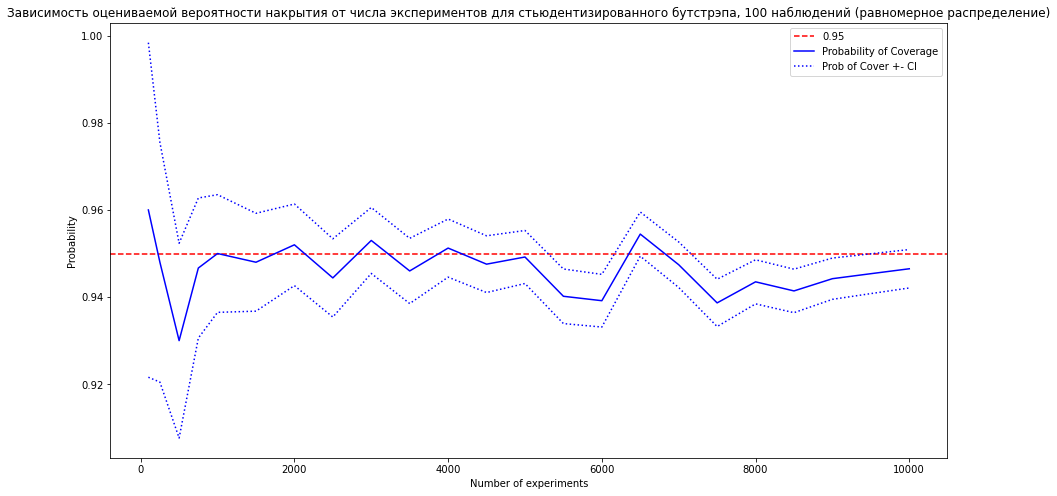

In [179]:
plt.figure(figsize=(15, 8))
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label='0.95')
plt.plot(num_exp, p_hat, color = 'b', label='Probability of Coverage')
plt.plot(num_exp, p_hat + stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':', label='Prob of Cover +- CI')
plt.plot(num_exp, p_hat - stats.norm.ppf(0.975) * se_p_hat, color = 'b', linestyle = ':')
plt.title('Зависимость оцениваемой вероятности накрытия от числа экспериментов для стьюдентизированного бутстрэпа, 100 наблюдений (равномерное распределение)')
plt.xlabel("Number of experiments")
plt.ylabel("Probability")
plt.legend();

In [180]:
df = pd.DataFrame((p_hat, p_hat + stats.norm.ppf(0.975) * se_p_hat, 
                   p_hat - stats.norm.ppf(0.975) * se_p_hat, num_exp)).T
df.columns = ['p_hat', 'CI_upper', 'CI_lower', 'num_exp']
df.to_csv('Studentized_uniform_sample_size_100.csv')